# Exploratory Data Analysis (EDA) on <Dataset Name>

## 1. Objective
In this notebook, I will perform Exploratory Data Analysis (EDA) on the dataset **deliveries** and **matches**.  
The main goals are:
- Understand the structure of the dataset
- Clean and preprocess the data
- Explore distributions of features
- Identify relationships and correlations
- Detect outliers and missing values

## 2. Dataset Description
- Source: Kaggle 
- Number of rows: xxx  
- Number of columns: xxx  
- Target variable (if any): <target>  

## 3. Libraries Used
- pandas → data manipulation  
- numpy → numerical operations  
- matplotlib / seaborn → data visualization


## The specific analysis objectives are:
1. **Team Performance Insights**
   - Analyze team-wise win distribution across seasons
   - Compare effectiveness of batting first vs chasing
   - Study the impact of toss decision on match outcomes

2. **Player Performance Trends**
   - Identify top run scorers and wicket takers across seasons
   - Evaluate strike rates
   - Highlight consistent performers and match winners (Player of the Match)

3. **Batting Strategy Analysis**
   - Runs scored by batting order positions (openers vs middle order)
   - Over-wise scoring patterns (Powerplay, Middle, Death overs)
   - Analysis of high-scoring matches and successful run chases

4. **Bowling Strategy Analysis**
   - Wicket distribution by over and dismissal type
   - Economy rate trends in different phases of the game
   - Comparison of bowler performance across venues and eras

## Importing Required libraries

In [673]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## load the datasets using the pandas

In [674]:
deli = pd.read_csv('deliveries.csv')
mat = pd.read_csv('matches.csv')

In [675]:
deli.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [676]:
mat.head(1)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen


In [677]:
deli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [678]:
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [679]:
# describe
deli.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In [680]:
mat.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


## Handling Null Values in delivery dataset

In [681]:
# sum of null values in each column
deli.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

**Null Values Columns**:extras_type,player_dismissed,dismissal_kind,fielder

In [682]:
# checking what are the unique values present in those columns
print(f"{deli.extras_type.value_counts()}")
print(f"\n{deli.value_counts()}")
print(f"\n{deli.dismissal_kind.value_counts()}")
print(f"\n{deli.fielder.value_counts()}")

extras_type
wides      8380
legbyes    4001
noballs    1069
byes        673
penalty       2
Name: count, dtype: int64

match_id  inning  batting_team                 bowling_team                 over  ball  batter            bowler             non_striker       batsman_runs  extra_runs  total_runs  extras_type  is_wicket  player_dismissed  dismissal_kind  fielder         
336010    1       Kolkata Knight Riders        Royal Challengers Bangalore  8     6     DJ Hussey         A Kumble           T Taibu           0             1           1           legbyes      1          DJ Hussey         run out         DW Steyn            1
336020    1       Delhi Daredevils             Deccan Chargers              15    2     G Gambhir         PP Ojha            S Dhawan          0             1           1           wides        1          G Gambhir         stumped         AC Gilchrist        1
392217    2       Chennai Super Kings          Rajasthan Royals             16    6     ML Hayden      

In [683]:
deli[['batter','batsman_runs','extra_runs','total_runs','extras_type']].head(20)

,batter,batsman_runs,extra_runs,total_runs,extras_type
0,SC Ganguly,0,1,1,legbyes
1,BB McCullum,0,0,0,NaN
2,BB McCullum,0,1,1,wides
3,BB McCullum,0,0,0,NaN
4,BB McCullum,0,0,0,NaN
5,BB McCullum,0,0,0,NaN
6,BB McCullum,0,1,1,legbyes
7,BB McCullum,0,0,0,NaN
8,BB McCullum,4,0,4,NaN
9,BB McCullum,4,0,4,NaN


**handling extras type**  
when i extra_runs == 0 and then extras should be noExtras instead of NaN

In [684]:
len(deli.loc[(deli['extra_runs'] == 0),['extras_type']])

246795

In [685]:
# deli.loc[deli['extra_runs'] == 0, 'extras_type'] = deli.loc[deli['extra_runs'] == 0, 'extras_type'].fillna('noExtra')
deli.fillna({'extras_type': 'noExtra'}, inplace=True)

In [686]:
len(deli.loc[deli['player_dismissed'].isna(),:])

247970

**hadling players dismissed**  
when the columns is_wicket == 0 then player_dismissed  column value should be not_dismissed

In [687]:
# deli.loc[deli['is_wicket'] == 0, 'player_dismissed'] = deli.loc[deli['is_wicket'] == 0, 'player_dismissed'].fillna('notDismissed')
deli.fillna({'player_dismissed': 'notDismissed'}, inplace=True)

In [688]:
# deli.loc[deli['is_wicket'] == 0, 'dismissal_kind'] = deli.loc[deli['is_wicket'] == 0, 'dismissal_kind'].fillna('notDismissed')
deli.fillna({'dismissal_kind': 'notDismissed'}, inplace=True)

In [689]:
deli.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type              0
is_wicket                0
player_dismissed         0
dismissal_kind           0
fielder             251566
dtype: int64

In [690]:
# dismissal_kind
# caught                   8063
# bowled                   2212
# run out                  1114
# lbw                       800
# caught and bowled         367
# stumped                   358
# retired hurt               15
# hit wicket                 15
# obstructing the field       3
# retired out                 3
# Name: count, dtype: int64

dismissal_kinds = [
    "lbw", "caught", "run out", "caught and bowled", "stumped",
    "retired hurt", "hit wicket", "obstructing the field", "retired out","bowled"
]

len(deli.loc[
    (deli['is_wicket'] == 0) | 
    ((deli['dismissal_kind'].isin(dismissal_kinds)) & deli['fielder'].isna()),
    'fielder'
])

251566

In [691]:
# cond = (deli['is_wicket'] == 0) | (deli['dismissal_kind'].isin(dismissal_kinds))
# deli.loc[cond, 'fielder'] = deli['fielder'].fillna('notApplied')
deli.fillna({'fielder': 'notApplied'}, inplace=True)

In [692]:
deli.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

In [693]:
mat.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [694]:
mat['city'].value_counts()

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Visakhapatnam      15
Durban             15
Lucknow            14
Dubai              13
Dharamsala         13
Centurion          12
Rajkot             10
Sharjah            10
Navi Mumbai         9
Indore              9
Johannesburg        8
Ranchi              7
Cuttack             7
Cape Town           7
Port Elizabeth      7
Raipur              6
Kochi               5
Mohali              5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Guwahati            3
Bloemfontein        2
Name: count, dtype: int64

In [695]:
null_in_column = mat[mat['city'].isnull()]
null_in_column

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
399,729281,2014,NaN,2014-04-17,League,YS Chahal,Sharjah Cricket Stadium,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,146.0,20.0,N,NaN,Aleem Dar,S Ravi
402,729287,2014,NaN,2014-04-19,League,PA Patel,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,116.0,20.0,N,NaN,Aleem Dar,AK Chaudhary
403,729289,2014,NaN,2014-04-19,League,JP Duminy,Dubai International Cricket Stadium,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,167.0,20.0,N,NaN,Aleem Dar,VA Kulkarni
404,729291,2014,NaN,2014-04-20,League,GJ Maxwell,Sharjah Cricket Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,192.0,20.0,N,NaN,BF Bowden,M Erasmus
406,729295,2014,NaN,2014-04-22,League,GJ Maxwell,Sharjah Cricket Stadium,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,194.0,20.0,N,NaN,M Erasmus,S Ravi
407,729297,2014,NaN,2014-04-23,League,RA Jadeja,Dubai International Cricket Stadium,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,141.0,20.0,N,NaN,HDPK Dharmasena,RK Illingworth
408,729299,2014,NaN,2014-04-24,League,CA Lynn,Sharjah Cricket Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.0,151.0,20.0,N,NaN,Aleem Dar,VA Kulkarni
409,729301,2014,NaN,2014-04-25,League,AJ Finch,Dubai International Cricket Stadium,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.0,185.0,20.0,N,NaN,M Erasmus,S Ravi
410,729303,2014,NaN,2014-04-25,League,MM Sharma,Dubai International Cricket Stadium,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,142.0,20.0,N,NaN,BF Bowden,M Erasmus
413,729309,2014,NaN,2014-04-27,League,M Vijay,Sharjah Cricket Stadium,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.0,126.0,20.0,N,NaN,Aleem Dar,VA Kulkarni


In [696]:
mat.loc[mat['city'].isnull(),['venue']].value_counts()

venue                              
Dubai International Cricket Stadium    33
Sharjah Cricket Stadium                18
Name: count, dtype: int64

**we can see here only these venues has null values so replace with those city names**

In [697]:
mat['city'] = mat['venue'].replace({
    "Dubai International Cricket Stadium": "Dubai",
    "Sharjah Cricket Stadium": "Sharjah"
})

In [698]:
mat.isnull().sum()

id                    0
season                0
city                  0
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [699]:
# mat['player_of_match'].fillna("not apply", inplace=True)

In [700]:
mat.fillna({"player_of_match": "not apply"}, inplace=True)

In [701]:
mat.isnull().sum()

id                    0
season                0
city                  0
date                  0
match_type            0
player_of_match       0
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [702]:
mat.fillna({"winner": "not winner"}, inplace=True)

In [703]:
mat.isnull().sum()

id                    0
season                0
city                  0
date                  0
match_type            0
player_of_match       0
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                0
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [704]:
null_in_column = mat[mat['result_margin'].isnull()]
null_in_column

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
66,392190,2009,Newlands,2009-04-23,League,YK Pathan,Newlands,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,151.0,20.0,Y,NaN,MR Benson,M Erasmus
130,419121,2009/10,"MA Chidambaram Stadium, Chepauk",2010-03-21,League,J Theron,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,137.0,20.0,Y,NaN,K Hariharan,DJ Harper
241,501265,2011,Feroz Shah Kotla,2011-05-21,League,not apply,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,not winner,no result,NaN,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
328,598004,2013,"Rajiv Gandhi International Stadium, Uppal",2013-04-07,League,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,131.0,20.0,Y,NaN,AK Chaudhary,S Ravi
342,598017,2013,M Chinnaswamy Stadium,2013-04-16,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,153.0,20.0,Y,NaN,M Erasmus,VA Kulkarni
416,729315,2014,Sheikh Zayed Stadium,2014-04-29,League,JP Faulkner,Sheikh Zayed Stadium,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,153.0,20.0,Y,NaN,Aleem Dar,AK Chaudhary
475,829741,2015,"Sardar Patel Stadium, Motera",2015-04-21,League,SE Marsh,"Sardar Patel Stadium, Motera",Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,192.0,20.0,Y,NaN,M Erasmus,S Ravi
485,829763,2015,M Chinnaswamy Stadium,2015-04-29,League,not apply,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,not winner,no result,NaN,NaN,NaN,N,NaN,JD Cloete,PG Pathak
511,829813,2015,M Chinnaswamy Stadium,2015-05-17,League,not apply,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,not winner,no result,NaN,188.0,20.0,N,NaN,HDPK Dharmasena,K Srinivasan
610,1082625,2017,Saurashtra Cricket Association Stadium,2017-04-29,League,KH Pandya,Saurashtra Cricket Association Stadium,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,154.0,20.0,Y,NaN,AK Chaudhary,CB Gaffaney


In [705]:
mat.fillna({"result_margin": 0}, inplace=True)

In [706]:
mat.isnull().sum()

id                    0
season                0
city                  0
date                  0
match_type            0
player_of_match       0
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                0
result                0
result_margin         0
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [707]:
null_in_column = mat[mat['method'].isnull()]
null_in_column

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,M Chinnaswamy Stadium,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,"Punjab Cricket Association Stadium, Mohali",2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Feroz Shah Kotla,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Wankhede Stadium,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Eden Gardens,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,"Rajiv Gandhi International Stadium, Uppal, Hyd...",2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,"Narendra Modi Stadium, Ahmedabad",2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,"Narendra Modi Stadium, Ahmedabad",2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,"MA Chidambaram Stadium, Chepauk, Chennai",2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma


In [708]:
mat['method'].value_counts()

method
D/L    21
Name: count, dtype: int64

In [709]:
len(mat)

1095

In [710]:
mat.fillna({"method": "normal"}, inplace=True)

In [711]:
mat.isnull().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        3
target_overs       3
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

In [712]:
null_in_column = mat[mat['target_overs'].isnull()]
null_in_column

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Feroz Shah Kotla,2011-05-21,League,not apply,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,not winner,no result,0.0,NaN,NaN,N,normal,SS Hazare,RJ Tucker
485,829763,2015,M Chinnaswamy Stadium,2015-04-29,League,not apply,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,not winner,no result,0.0,NaN,NaN,N,normal,JD Cloete,PG Pathak
994,1359519,2023,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,2023-05-03,League,not apply,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,not winner,no result,0.0,NaN,NaN,N,normal,AK Chaudhary,NA Patwardhan


In [713]:
null_in_column = mat[mat['target_runs'].isnull()]
null_in_column

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Feroz Shah Kotla,2011-05-21,League,not apply,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,not winner,no result,0.0,NaN,NaN,N,normal,SS Hazare,RJ Tucker
485,829763,2015,M Chinnaswamy Stadium,2015-04-29,League,not apply,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,not winner,no result,0.0,NaN,NaN,N,normal,JD Cloete,PG Pathak
994,1359519,2023,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,2023-05-03,League,not apply,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,not winner,no result,0.0,NaN,NaN,N,normal,AK Chaudhary,NA Patwardhan


In [714]:
mat['target_runs'].value_counts()

target_runs
166.0    21
172.0    21
188.0    20
165.0    20
163.0    19
         ..
90.0      1
267.0     1
225.0     1
262.0     1
242.0     1
Name: count, Length: 170, dtype: int64

In [715]:
mat['target_overs'].value_counts()

target_overs
20.0    1062
6.0        4
16.0       3
8.0        3
10.0       3
12.0       3
18.0       2
11.0       2
17.0       2
13.0       2
5.0        2
9.2        1
9.0        1
14.0       1
15.0       1
Name: count, dtype: int64

In [716]:
mat.fillna({"target_overs": 0,"target_runs":0}, inplace=True)

In [717]:
mat.isnull().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

In [718]:
deli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       260920 non-null  object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  260920 non-null  object
 15  dismissal_kind    260920 non-null  object
 16  fielder           260920 non-null  obj

In [719]:
deli.loc[deli['batter'] == "BB McCullum",['batsman_runs']].sum()

batsman_runs    2882
dtype: int64

In [720]:
deli['batting_team'].value_counts()

batting_team
Mumbai Indians                 31437
Kolkata Knight Riders          29514
Chennai Super Kings            28651
Royal Challengers Bangalore    28205
Rajasthan Royals               26242
Kings XI Punjab                22646
Sunrisers Hyderabad            21843
Delhi Daredevils               18786
Delhi Capitals                 10946
Deccan Chargers                 9034
Punjab Kings                    6833
Gujarat Titans                  5494
Pune Warriors                   5443
Lucknow Super Giants            5400
Gujarat Lions                   3566
Rising Pune Supergiant          1900
Royal Challengers Bengaluru     1818
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: count, dtype: int64

In [721]:
deli.replace({
    "Royal Challengers Bangalore": "Royal Challengers Bengaluru",
    "Kings XI Punjab": "Punjab Kings",
    "Delhi Daredevils": "Delhi Capitals",
    "Rising Pune Supergiant": "Rising Pune Supergiants"
}, inplace=True)

In [722]:
venues = mat[['id','venue','city']].copy()
venues

,id,venue,city
0,335982,M Chinnaswamy Stadium,M Chinnaswamy Stadium
1,335983,"Punjab Cricket Association Stadium, Mohali","Punjab Cricket Association Stadium, Mohali"
2,335984,Feroz Shah Kotla,Feroz Shah Kotla
3,335985,Wankhede Stadium,Wankhede Stadium
4,335986,Eden Gardens,Eden Gardens
...,...,...,...
1090,1426307,"Rajiv Gandhi International Stadium, Uppal, Hyd...","Rajiv Gandhi International Stadium, Uppal, Hyd..."
1091,1426309,"Narendra Modi Stadium, Ahmedabad","Narendra Modi Stadium, Ahmedabad"
1092,1426310,"Narendra Modi Stadium, Ahmedabad","Narendra Modi Stadium, Ahmedabad"
1093,1426311,"MA Chidambaram Stadium, Chepauk, Chennai","MA Chidambaram Stadium, Chepauk, Chennai"


In [723]:
venues['venue'].value_counts().sort_values(ascending=True)

venue
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam        2
OUTsurance Oval                                                           2
Vidarbha Cricket Association Stadium, Jamtha                              3
Barsapara Cricket Stadium, Guwahati                                       3
Buffalo Park                                                              3
De Beers Diamond Oval                                                     3
Green Park                                                                4
Himachal Pradesh Cricket Association Stadium, Dharamsala                  4
Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh          5
Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur        5
Nehru Stadium                                                             5
Shaheed Veer Narayan Singh International Stadium                          6
St George's Park                                                          7
JSCA I

In [724]:
# Create a mapping of variants to standardized stadium names
stadium_map = {
    "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium": 
        "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam",
    "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam": 
        "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam",
    
    "Punjab Cricket Association IS Bindra Stadium": 
        "Punjab Cricket Association IS Bindra Stadium, Mohali",
    "Punjab Cricket Association IS Bindra Stadium, Mohali": 
        "Punjab Cricket Association IS Bindra Stadium, Mohali",
    "Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh": 
        "Punjab Cricket Association IS Bindra Stadium, Mohali",
    "Punjab Cricket Association Stadium, Mohali": 
        "Punjab Cricket Association IS Bindra Stadium, Mohali",
    
    "M Chinnaswamy Stadium": 
        "M Chinnaswamy Stadium, Bengaluru",
    "M Chinnaswamy Stadium, Bengaluru": 
        "M Chinnaswamy Stadium, Bengaluru",
    "M.Chinnaswamy Stadium": 
        "M Chinnaswamy Stadium, Bengaluru",
    
    "Arun Jaitley Stadium": 
        "Arun Jaitley Stadium, Delhi",
    "Arun Jaitley Stadium, Delhi": 
        "Arun Jaitley Stadium, Delhi",
    
    "Brabourne Stadium": 
        "Brabourne Stadium, Mumbai",
    "Brabourne Stadium, Mumbai": 
        "Brabourne Stadium, Mumbai",
    
    "MA Chidambaram Stadium": 
        "MA Chidambaram Stadium, Chepauk, Chennai",
    "MA Chidambaram Stadium, Chepauk": 
        "MA Chidambaram Stadium, Chepauk, Chennai",
    "MA Chidambaram Stadium, Chepauk, Chennai": 
        "MA Chidambaram Stadium, Chepauk, Chennai",
    
    "Wankhede Stadium": 
        "Wankhede Stadium, Mumbai",
    "Wankhede Stadium, Mumbai": 
        "Wankhede Stadium, Mumbai",
    
    "Dr DY Patil Sports Academy": 
        "Dr DY Patil Sports Academy, Mumbai",
    "Dr DY Patil Sports Academy, Mumbai": 
        "Dr DY Patil Sports Academy, Mumbai",
    
    "Eden Gardens": 
        "Eden Gardens, Kolkata",

    "Rajiv Gandhi International Stadium": "Rajiv Gandhi International Stadium, Uppal, Hyderabad",
    "Rajiv Gandhi International Stadium, Uppal": "Rajiv Gandhi International Stadium, Uppal, Hyderabad",
    "Rajiv Gandhi International Stadium, Uppal, Hyderabad": "Rajiv Gandhi International Stadium, Uppal, Hyderabad",
    
  
    "MA Chidambaram Stadium, Chepauk": "MA Chidambaram Stadium, Chepauk, Chennai",
    "MA Chidambaram Stadium, Chepauk, Chennai": "MA Chidambaram Stadium, Chepauk, Chennai",
    "MA Chidambaram Stadium": "MA Chidambaram Stadium, Chepauk, Chennai",
    
 
    "Arun Jaitley Stadium": "Arun Jaitley Stadium, Delhi",
    "Arun Jaitley Stadium, Delhi": "Arun Jaitley Stadium, Delhi",
    
 
    "Sawai Mansingh Stadium": "Sawai Mansingh Stadium, Jaipur",
    "Sawai Mansingh Stadium, Jaipur": "Sawai Mansingh Stadium, Jaipur",
    
 
    "Himachal Pradesh Cricket Association Stadium": "Himachal Pradesh Cricket Association Stadium, Dharamsala",
    "Himachal Pradesh Cricket Association Stadium, Dharamsala": "Himachal Pradesh Cricket Association Stadium, Dharamsala",

    "Maharashtra Cricket Association Stadium": "Maharashtra Cricket Association Stadium, Pune",

}

# Apply the mapping to standardize names
venues['venue'] = venues['venue'].replace(stadium_map)

# Optional: check counts after cleaning
# venues_counts = mat['venue'].value_counts().reset_index()
# venues_counts.columns = ['venue', 'count']
# venues_counts = venues_counts.sort_values(by='count', ascending=False)
# print(venues_counts)

In [725]:
venues['city'].value_counts()

city
Eden Gardens                                                             77
Wankhede Stadium                                                         73
M Chinnaswamy Stadium                                                    65
Feroz Shah Kotla                                                         60
Rajiv Gandhi International Stadium, Uppal                                49
MA Chidambaram Stadium, Chepauk                                          48
Sawai Mansingh Stadium                                                   47
Dubai                                                                    46
Wankhede Stadium, Mumbai                                                 45
Punjab Cricket Association Stadium, Mohali                               35
Sheikh Zayed Stadium                                                     29
Sharjah                                                                  28
MA Chidambaram Stadium, Chepauk, Chennai                                 28
Narendr

In [726]:
# Mapping of city/stadium name variants to standardized names
city_clean_map = {
    "Eden Gardens": "Kolkata",
    "Eden Gardens, Kolkata": "Kolkata",
    
    "Wankhede Stadium": "Mumbai",
    "Wankhede Stadium, Mumbai": "Mumbai",
    
    "M Chinnaswamy Stadium": "Bengaluru",
    "M Chinnaswamy Stadium, Bengaluru": "Bengaluru",
    "M.Chinnaswamy Stadium": "Bengaluru",
    
    "MA Chidambaram Stadium": "Chennai",
    "MA Chidambaram Stadium, Chepauk": "Chennai",
    "MA Chidambaram Stadium, Chepauk, Chennai": "Chennai",
    
    "Dr DY Patil Sports Academy": "Mumbai",
    "Dr DY Patil Sports Academy, Mumbai": "Mumbai",
    
    "Arun Jaitley Stadium": "Delhi",
    "Arun Jaitley Stadium, Delhi": "Delhi",
    
    "Rajiv Gandhi International Stadium": "Hyderabad",
    "Rajiv Gandhi International Stadium, Uppal": "Hyderabad",
    "Rajiv Gandhi International Stadium, Uppal, Hyderabad": "Hyderabad",
    
    "Sawai Mansingh Stadium": "Jaipur",
    "Sawai Mansingh Stadium, Jaipur": "Jaipur",
    
    "Himachal Pradesh Cricket Association Stadium": "Dharamsala",
    "Himachal Pradesh Cricket Association Stadium, Dharamsala": "Dharamsala",
    
    "Punjab Cricket Association IS Bindra Stadium": "Mohali",
    "Punjab Cricket Association IS Bindra Stadium, Mohali": "Mohali",
    "Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh": "Mohali",
    "Punjab Cricket Association Stadium, Mohali": "Mohali",
    
    "Maharashtra Cricket Association Stadium": "Pune",
    "Maharashtra Cricket Association Stadium, Pune": "Pune",
    
    "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium": "Visakhapatnam",
    "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam": "Visakhapatnam",

    "Narendra Modi Stadium, Ahmedabad": "Ahmedabad",
    "Brabourne Stadium, Mumbai": "Mumbai",
    "Subrata Roy Sahara Stadium": "Kolkata",
    "Visakhapatnam": "Visakhapatnam",
    "Kingsmead": "Durban",
    "Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow": "Lucknow",
    "Dharamsala": "Dharamsala",
    "Sardar Patel Stadium, Motera": "Ahmedabad",
    "SuperSport Park": "Centurion",
    "Saurashtra Cricket Association Stadium": "Rajkot",
    "Brabourne Stadium": "Mumbai",
    "Holkar Cricket Stadium": "Indore",
    "New Wanderers Stadium": "Johannesburg",
    "Zayed Cricket Stadium, Abu Dhabi": "Abu Dhabi",
    "JSCA International Stadium Complex": "Ranchi",
    "Barabati Stadium": "Cuttack",
    "Newlands": "Cape Town",
    "St George's Park": "Port Elizabeth",
    "Shaheed Veer Narayan Singh International Stadium": "Raipur",
    "Nehru Stadium": "Pune",
    "Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur": "Mullanpur",
    "Green Park": "Kanpur",
    "Buffalo Park": "East London",
    "De Beers Diamond Oval": "Kimberley",
    "Vidarbha Cricket Association Stadium, Jamtha": "Nagpur",
    "Barsapara Cricket Stadium, Guwahati": "Guwahati",
    "OUTsurance Oval": "Bloemfontein",
    "Sheikh Zayed Stadium":"Abu Dhabi"
}



# Apply mapping
venues['city'] = venues['city'].replace(city_clean_map)  # assuming your city data is in 'city_list'

# Optional: count occurrences after cleaning
# city_counts = cities_cleaned.value_counts().reset_index()
# city_counts.columns = ['city', 'match_count']
# city_counts = city_counts.sort_values(by='match_count', ascending=False)

# print(city_counts)


In [727]:
venues['venue'].value_counts().sort_values(ascending=True)

venue
OUTsurance Oval                                                            2
Vidarbha Cricket Association Stadium, Jamtha                               3
De Beers Diamond Oval                                                      3
Buffalo Park                                                               3
Barsapara Cricket Stadium, Guwahati                                        3
Green Park                                                                 4
Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur         5
Nehru Stadium                                                              5
Shaheed Veer Narayan Singh International Stadium                           6
St George's Park                                                           7
Newlands                                                                   7
JSCA International Stadium Complex                                         7
Barabati Stadium                                                      

In [728]:
mat['venue'].value_counts().sort_values(ascending=True)

venue
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam        2
OUTsurance Oval                                                           2
Vidarbha Cricket Association Stadium, Jamtha                              3
Barsapara Cricket Stadium, Guwahati                                       3
Buffalo Park                                                              3
De Beers Diamond Oval                                                     3
Green Park                                                                4
Himachal Pradesh Cricket Association Stadium, Dharamsala                  4
Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh          5
Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur        5
Nehru Stadium                                                             5
Shaheed Veer Narayan Singh International Stadium                          6
St George's Park                                                          7
JSCA I

In [729]:
mat.shape

(1095, 20)

In [730]:
venues.shape

(1095, 3)

In [731]:
venues.head(2)

,id,venue,city
0,335982,"M Chinnaswamy Stadium, Bengaluru",Bengaluru
1,335983,"Punjab Cricket Association IS Bindra Stadium, ...",Mohali


In [732]:
mat.head(2)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,M Chinnaswamy Stadium,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,normal,Asad Rauf,RE Koertzen
1,335983,2007/08,"Punjab Cricket Association Stadium, Mohali",2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,normal,MR Benson,SL Shastri


In [733]:
# replaceing in original dataframe mat
mat['venue'] = venues['venue']
mat['city'] = venues['city']

In [734]:
# now checking the value counts of venues
mat['venue'].value_counts().sort_values(ascending=True)

venue
OUTsurance Oval                                                            2
Vidarbha Cricket Association Stadium, Jamtha                               3
De Beers Diamond Oval                                                      3
Buffalo Park                                                               3
Barsapara Cricket Stadium, Guwahati                                        3
Green Park                                                                 4
Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur         5
Nehru Stadium                                                              5
Shaheed Veer Narayan Singh International Stadium                           6
St George's Park                                                           7
Newlands                                                                   7
JSCA International Stadium Complex                                         7
Barabati Stadium                                                      

In [735]:
deli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       260920 non-null  object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  260920 non-null  object
 15  dismissal_kind    260920 non-null  object
 16  fielder           260920 non-null  obj

<h3>Team Performace Insights</h3>

- Analyze team-wise win distribution across seasons
- Compare effectiveness of batting first vs chasing
- Study the impact of toss decision on match outcomes

<b><font color="red" size="5px">Analyze team wise win distribution across seasons</font></b>

In [736]:
mat.head(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bengaluru,2008-04-18,League,BB McCullum,"M Chinnaswamy Stadium, Bengaluru",Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,normal,Asad Rauf,RE Koertzen
1,335983,2007/08,Mohali,2008-04-19,League,MEK Hussey,"Punjab Cricket Association IS Bindra Stadium, ...",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,normal,MR Benson,SL Shastri
2,335984,2007/08,Feroz Shah Kotla,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,normal,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,"Wankhede Stadium, Mumbai",Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,normal,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,"Eden Gardens, Kolkata",Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,normal,BF Bowden,K Hariharan


In [737]:
mat['winner'] = mat['winner'].replace('Royal Challengers Bengaluru', 'Royal Challengers Bangalore')
mat['winner'] = mat['winner'].replace('Rising Pune Supergiant', 'Rising Pune Supergiants')

In [738]:
team_wins_by_season = mat.groupby(['season', 'winner']).size().reset_index(name='matches_won').sort_values(['season', 'matches_won'], ascending=[True, False])

In [739]:
team_wins_by_season

,season,winner,matches_won
6,2007/08,Rajasthan Royals,13
3,2007/08,Kings XI Punjab,10
0,2007/08,Chennai Super Kings,9
2,2007/08,Delhi Daredevils,7
5,2007/08,Mumbai Indians,7
...,...,...,...
144,2024,Lucknow Super Giants,7
148,2024,Royal Challengers Bangalore,7
142,2024,Gujarat Titans,5
146,2024,Punjab Kings,5


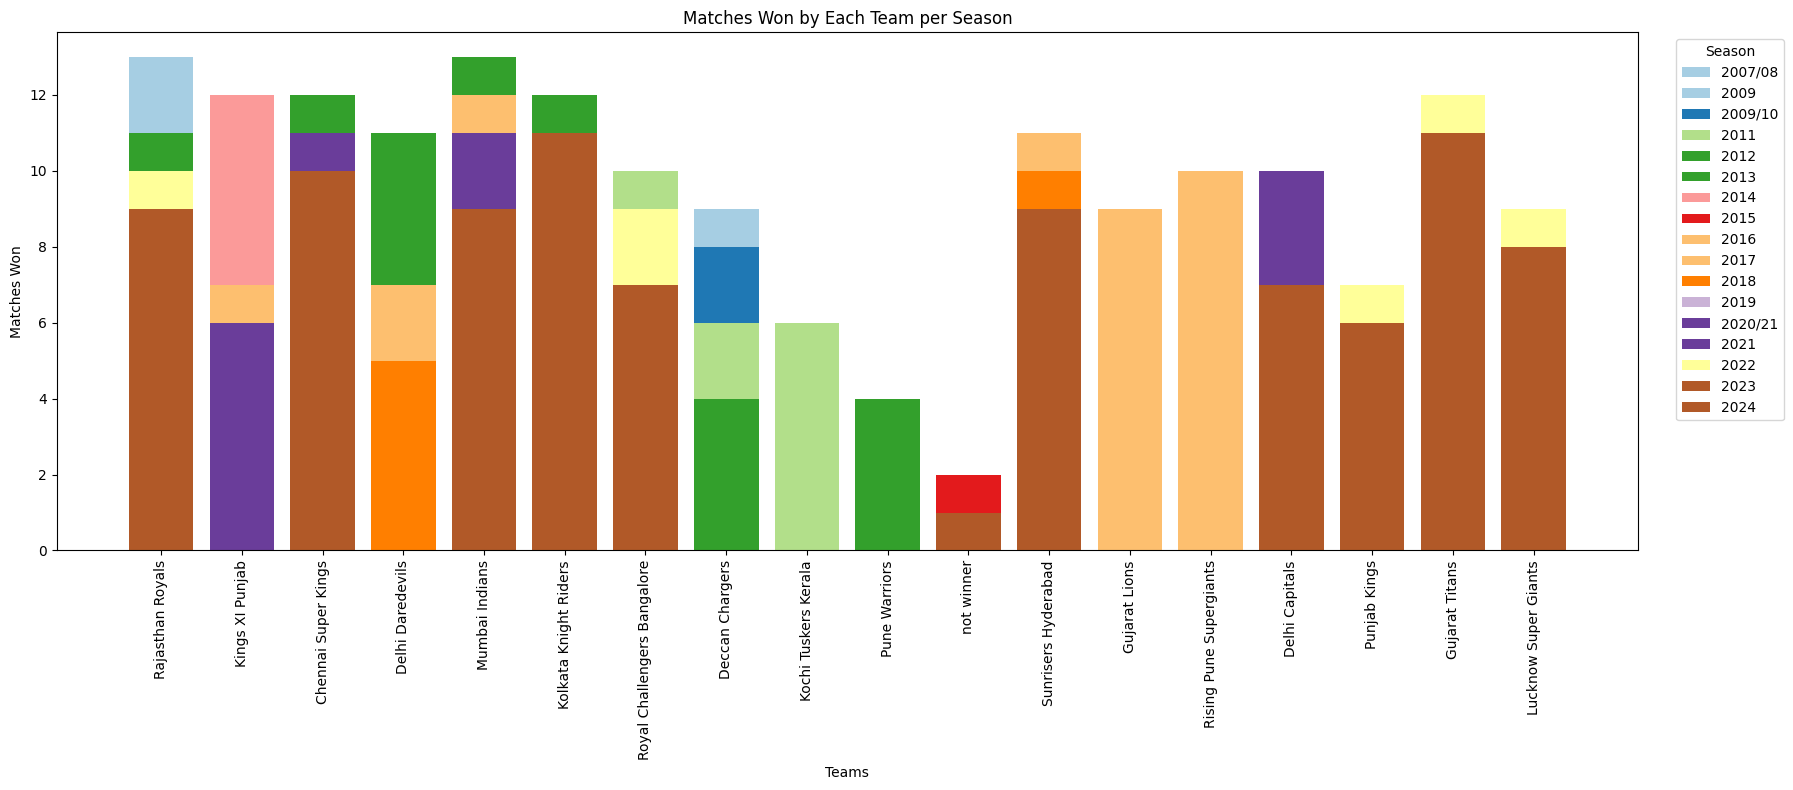

In [740]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

seasons = sorted(team_wins_by_season['season'].unique())
colors = plt.cm.Paired(np.linspace(0, 1, len(seasons)))


plt.figure(figsize=(18, 8))

for i, season in enumerate(seasons):
    data = team_wins_by_season[team_wins_by_season['season'] == season]
    plt.bar(data['winner'], data['matches_won'], color=colors[i], label=season)

plt.xticks(rotation=90)
plt.xlabel("Teams")
plt.ylabel("Matches Won")
plt.title("Matches Won by Each Team per Season")
plt.legend(title="Season", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [741]:
teamswinbyseason = pd.crosstab(mat['season'], mat['winner'])
teamswinbyseason

winner,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Gujarat Titans,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Pune Warriors,Punjab Kings,Rajasthan Royals,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad,not winner
season,,,,,,,,,,,,,,,,,,
2007/08,9,2,0,7,0,0,10,0,6,0,7,0,0,13,0,4,0,0
2009,8,9,0,10,0,0,7,0,3,0,5,0,0,6,0,9,0,0
2009/10,9,8,0,7,0,0,4,0,7,0,11,0,0,6,0,8,0,0
2011,11,6,0,4,0,0,7,6,8,0,10,4,0,6,0,10,0,1
2012,10,4,0,11,0,0,8,0,12,0,10,4,0,7,0,8,0,0
2013,12,0,0,3,0,0,8,0,6,0,13,4,0,11,0,9,10,0
2014,10,0,0,2,0,0,12,0,11,0,7,0,0,7,0,5,6,0
2015,10,0,0,5,0,0,3,0,7,0,10,0,0,7,0,8,7,2
2016,0,0,0,7,9,0,4,0,8,0,7,0,0,0,5,9,11,0


In [742]:
def teamwinbyseason(teamname):
    plt.figure(figsize=(18, 8))
    sns.lineplot(data=teamswinbyseason,x="season",y=teamname,marker='o',linewidth=2)
    plt.ylabel("Wins")
    plt.show()

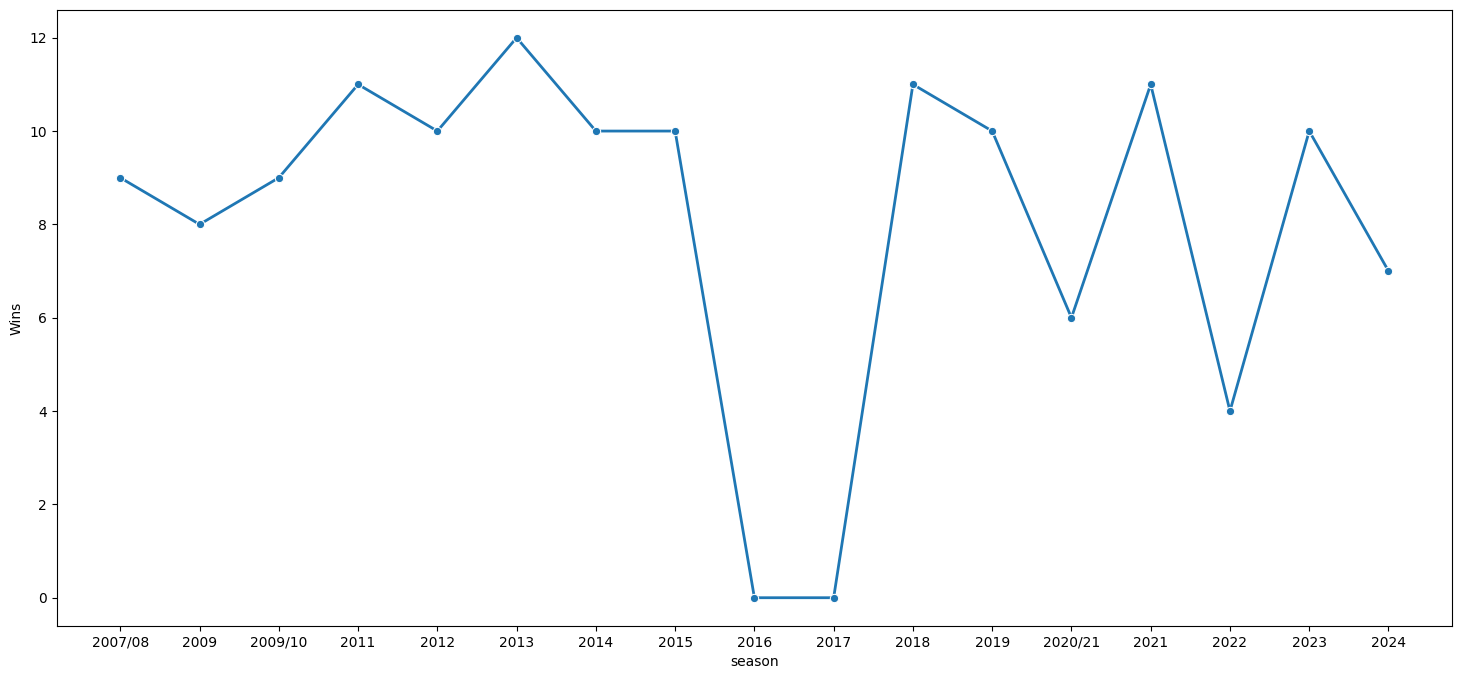

In [743]:
teamwinbyseason("Chennai Super Kings")

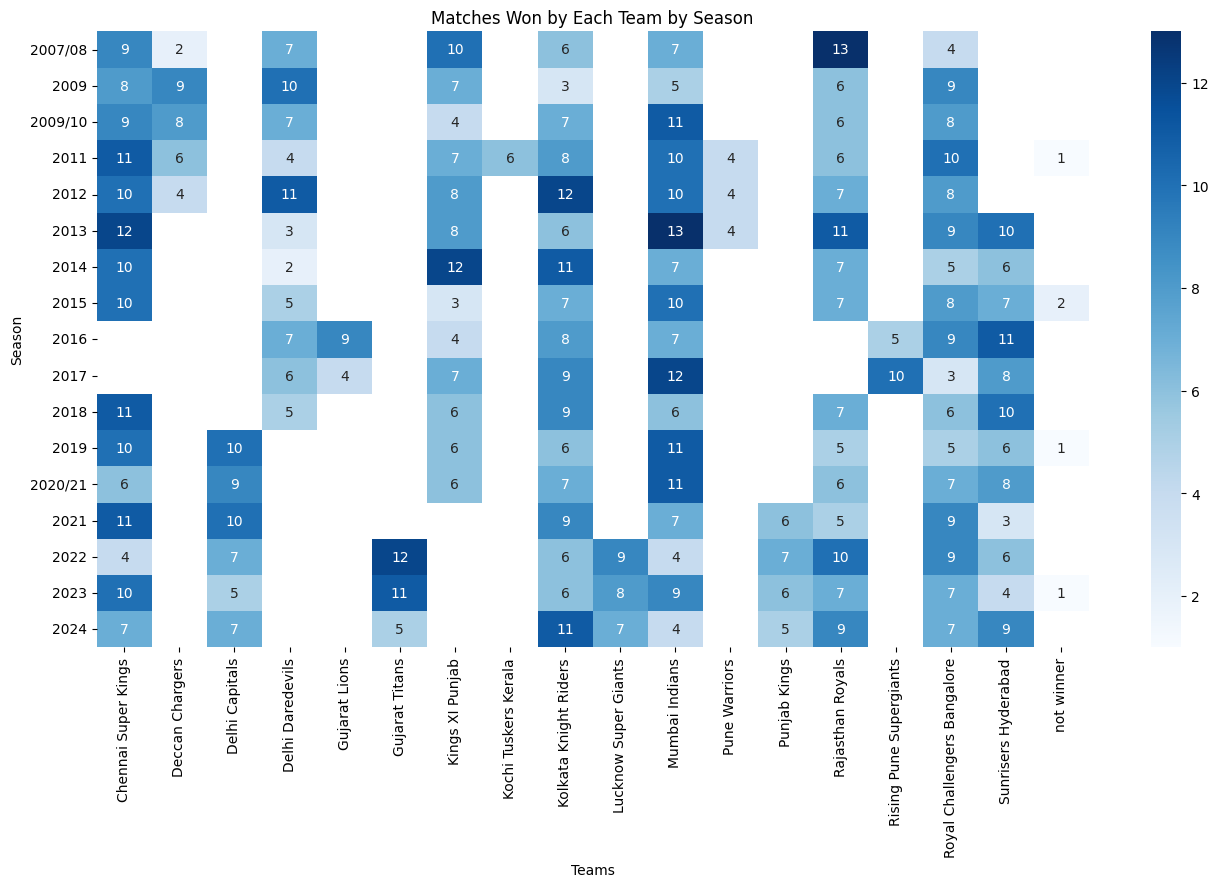

In [744]:
pivot = team_wins_by_season.pivot(index='season', columns='winner', values='matches_won')

plt.figure(figsize=(16,8))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='Blues')
plt.title("Matches Won by Each Team by Season")
plt.xlabel("Teams")
plt.ylabel("Season")
plt.show()

<b><font color="red" size="4px">Compare effectiveness of batting first vs chasing</font></b>

In [745]:
valid_results = mat[mat['result'].isin(['wickets', 'runs'])]

In [746]:
wins_by_type = (
    valid_results.groupby(['season', 'result'])
    .size()
    .reset_index(name='count')
)

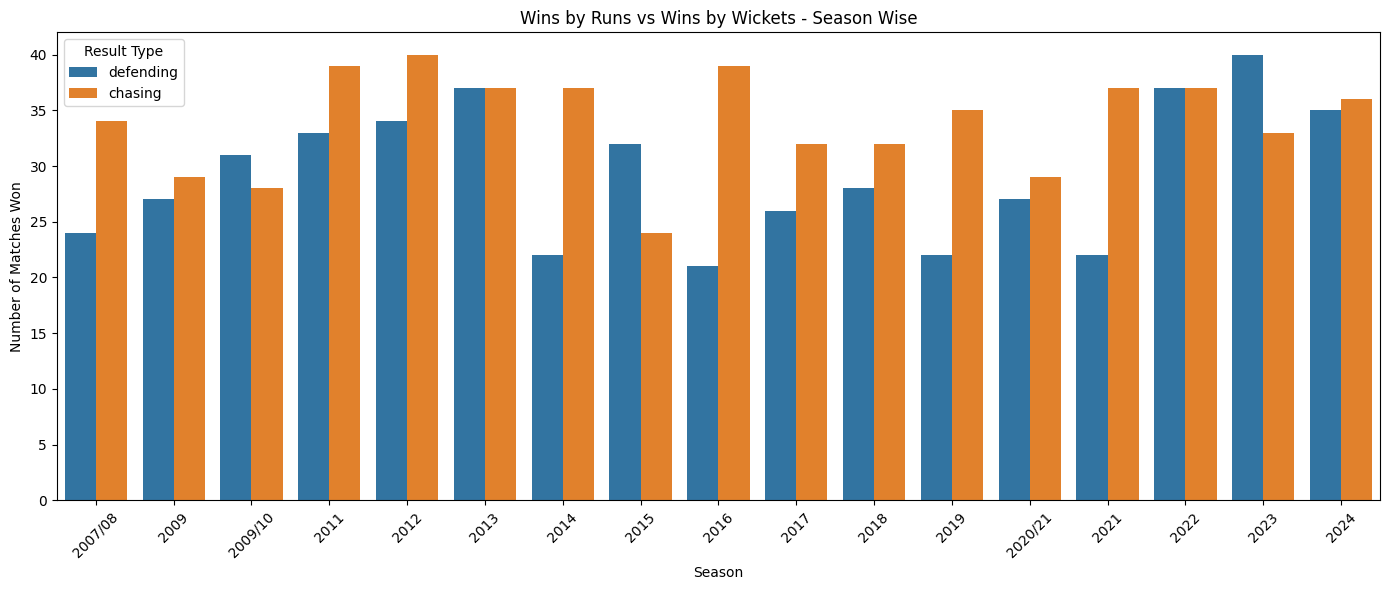

In [747]:
wins_by_type['result'] = wins_by_type['result'].replace({
    'runs': 'defending',
    'wickets': 'chasing'
})


plt.figure(figsize=(14,6))
sns.barplot(data=wins_by_type, x='season', y='count', hue='result')

plt.title("Wins by Runs vs Wins by Wickets - Season Wise")
plt.xlabel("Season")
plt.ylabel("Number of Matches Won")
plt.xticks(rotation=45)
plt.legend(title="Result Type")
plt.tight_layout()
plt.show()

<b><font color="red" size="3px">Study the impact of toss decision on match outcomes</font></b>

In [748]:
mat['toss_effective'] = (mat['toss_winner'] == mat['winner'])

toss_effectiveness = (
    mat.groupby(['season', 'toss_effective'])
    .size()
    .reset_index(name='count')
)

# Replace boolean values with readable text
toss_effectiveness['toss_effective'] = toss_effectiveness['toss_effective'].replace({
    True: 'Toss Helped',
    False: 'Toss Not Helped'
})

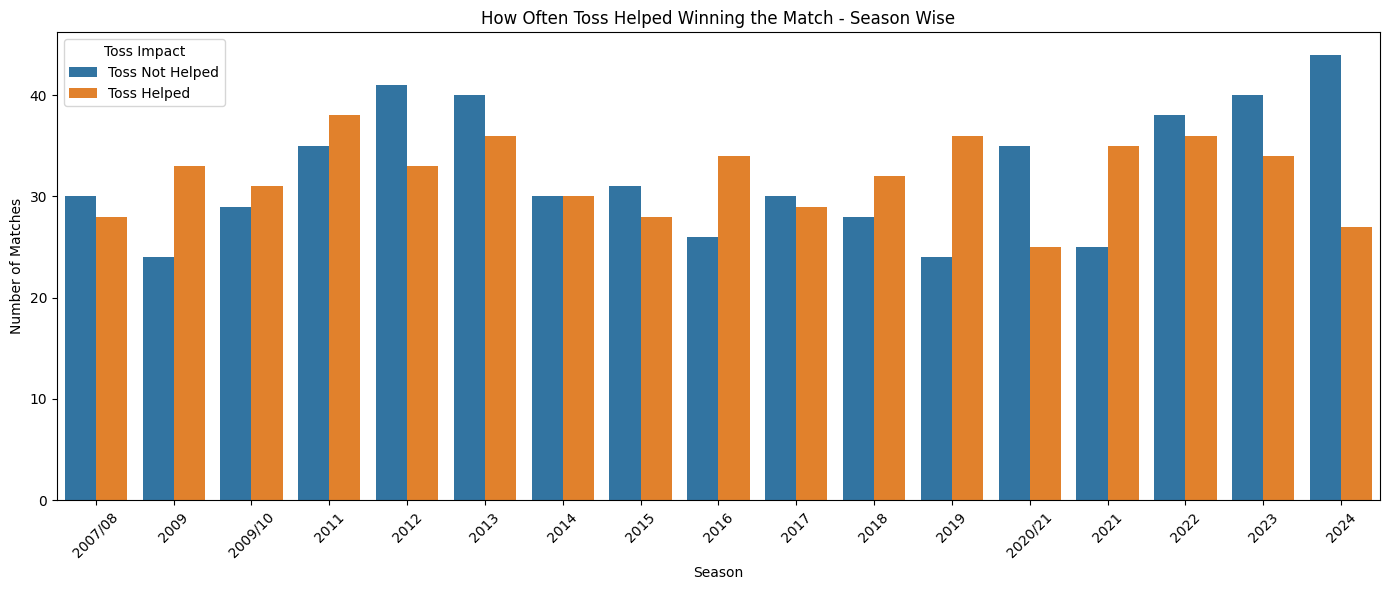

In [749]:
plt.figure(figsize=(14,6))
ax = sns.barplot(
    data=toss_effectiveness,
    x='season',
    y='count',
    hue='toss_effective'
)

plt.title("How Often Toss Helped Winning the Match - Season Wise")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.xticks(rotation=45)

plt.legend(title="Toss Impact")
plt.tight_layout()
plt.show()

<h3>Player Performance Trends</h3>

- Identify top run scorers and wicket takers across seasons
- Evaluate strike rates, economy rates, and boundary distributions
- Highlight consistent performers and match winners (Player of the Match)

<font color="red" size="5px">Identify top run scorers and wicket takers across seasons</font>

In [750]:
match_season = mat[['id', 'season']]

In [751]:
deli = deli.merge(match_season, left_on='match_id', right_on='id', how='left')

In [752]:
deli.drop(columns=['id'], inplace=True)

In [753]:
deli.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,season
0,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,notDismissed,notDismissed,notApplied,2007/08
1,335982,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,noExtra,0,notDismissed,notDismissed,notApplied,2007/08


In [754]:
deli['is_wicket'].value_counts()

is_wicket
0    247970
1     12950
Name: count, dtype: int64

In [755]:
deli['dismissal_kind'].value_counts()

dismissal_kind
notDismissed             247970
caught                     8063
bowled                     2212
run out                    1114
lbw                         800
caught and bowled           367
stumped                     358
retired hurt                 15
hit wicket                   15
obstructing the field         3
retired out                   3
Name: count, dtype: int64

In [756]:
deli.loc[deli['dismissal_kind'] == "run out",:].head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,season
197,335982,2,Royal Challengers Bengaluru,Kolkata Knight Riders,11,1,AA Noffke,SC Ganguly,P Kumar,1,0,1,noExtra,1,AA Noffke,run out,AB Agarkar,2007/08
496,335984,1,Rajasthan Royals,Delhi Capitals,3,5,YK Pathan,B Geeves,SR Watson,0,0,0,noExtra,1,YK Pathan,run out,notApplied,2007/08


In [757]:
batsman_season_runs = (
    deli.groupby(['batter', 'season'])['batsman_runs']
    .sum()
    .reset_index(name='runs')
)

batsman_season_runs.head(2)

,batter,season,runs
0,A Ashish Reddy,2012,35
1,A Ashish Reddy,2013,125


In [758]:
top5_batsman_per_season = (
    batsman_season_runs
    .sort_values(['season', 'runs'], ascending=[True, False])
    .groupby('season')
    .head(5)
    .reset_index(drop=True)
)

top5_batsman_per_season

,batter,season,runs
0,SE Marsh,2007/08,616
1,G Gambhir,2007/08,534
2,ST Jayasuriya,2007/08,514
3,SR Watson,2007/08,472
4,GC Smith,2007/08,441
...,...,...,...
80,V Kohli,2024,741
81,RD Gaikwad,2024,583
82,R Parag,2024,573
83,TM Head,2024,567


In [759]:
def top_batsmen_by_season(season):
    season_data = batsman_season_runs[batsman_season_runs['season'] == season]
    top5 = season_data.sort_values('runs', ascending=False).head(5)
    return top5.reset_index(drop=True)

# Example usage:
top_batsmen_by_season("2021")

,batter,season,runs
0,RD Gaikwad,2021,635
1,F du Plessis,2021,633
2,KL Rahul,2021,626
3,S Dhawan,2021,587
4,GJ Maxwell,2021,513


In [760]:
def plot_top_batsmen_by_season(season):
    season_data = batsman_season_runs[batsman_season_runs['season'] == season]
    top5 = season_data.sort_values('runs', ascending=False).head(5)
    
    # Colors for bars
    colors = plt.cm.tab10(np.linspace(0, 1, len(top5)))
    
    plt.figure(figsize=(8,5))
    bars = plt.bar(top5['batter'], top5['runs'], color=colors)
    
    # Add run labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 2, 
                 f"{height}", ha='center', fontsize=9)
    
    plt.title(f"Top 5 Run Scorers - IPL {season}")
    plt.xlabel("Batsman")
    plt.ylabel("Runs")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

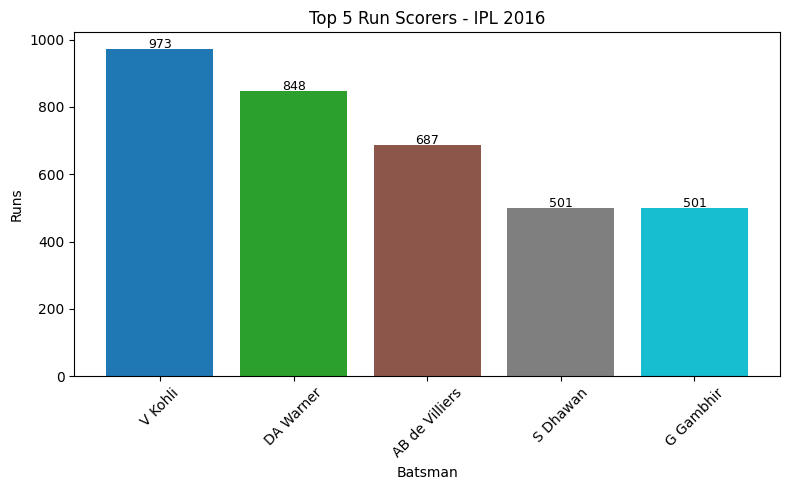

In [761]:
plot_top_batsmen_by_season("2016")

In [762]:
valid_wicket_types = [
    'caught',
    'bowled',
    'lbw',
    'stumped',
    'caught and bowled',
    'hit wicket'
]

bowler_wickets = deli[
    (deli['is_wicket'] == 1) &
    (deli['dismissal_kind'].isin(valid_wicket_types))
]

In [763]:
bowler_season_wkts = (
    bowler_wickets
    .groupby(['bowler', 'season'])['is_wicket']
    .count()
    .reset_index(name='wickets')
)

bowler_season_wkts.head()

,bowler,season,wickets
0,A Ashish Reddy,2012,11
1,A Ashish Reddy,2013,3
2,A Ashish Reddy,2015,3
3,A Ashish Reddy,2016,1
4,A Badoni,2022,2


In [764]:
top5_bowler_per_season = (
    bowler_season_wkts
    .sort_values(['season', 'wickets'], ascending=[True, False])
    .groupby('season')
    .head(5)
    .reset_index(drop=True)
)

top5_bowler_per_season.head()

,bowler,season,wickets
0,Sohail Tanvir,2007/08,22
1,S Sreesanth,2007/08,19
2,SK Warne,2007/08,19
3,JA Morkel,2007/08,17
4,MS Gony,2007/08,17


In [765]:
def plot_top_bowlers_by_season(season):
    data = bowler_season_wkts[bowler_season_wkts['season'] == season]
    top5 = data.sort_values('wickets', ascending=False).head(5)
    
    colors = plt.cm.tab10(np.linspace(0, 1, len(top5)))
    
    plt.figure(figsize=(8,5))
    bars = plt.bar(top5['bowler'], top5['wickets'], color=colors)
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
                 f"{height}", ha='center', fontsize=9)
    
    plt.title(f"Top 5 Wicket Takers - IPL {season}")
    plt.xlabel("Bowler")
    plt.ylabel("Wickets")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

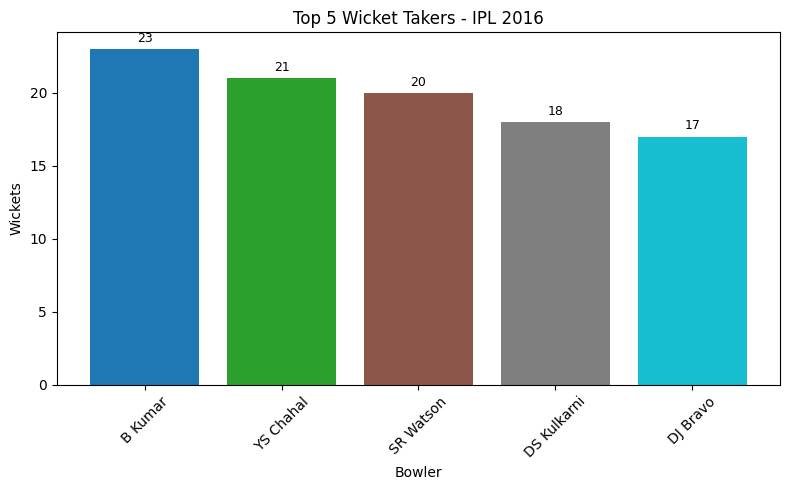

In [766]:
plot_top_bowlers_by_season("2016")

<font color="red" size="5px">Evaluate strike rates</font>

In [767]:
deli['extras_type'].value_counts()

extras_type
noExtra    246795
wides        8380
legbyes      4001
noballs      1069
byes          673
penalty         2
Name: count, dtype: int64

In [768]:
deli['extra_runs'].value_counts()

extra_runs
0    246795
1     12628
2       585
4       504
5       325
3        82
7         1
Name: count, dtype: int64

In [769]:
# Consider only legal balls faced by batsman (exclude wides)
balls_faced = deli[deli['extras_type'] != 'wides']

# Group by batsman + season: count balls + sum runs
batting_stats = balls_faced.groupby(['batter', 'season']).agg(
    runs=('batsman_runs', 'sum'),
    balls=('ball', 'count')
).reset_index()

# Calculate Strike Rate
batting_stats['strike_rate'] = (batting_stats['runs'] / batting_stats['balls']) * 100

batting_stats.head(5)

,batter,season,runs,balls,strike_rate
0,A Ashish Reddy,2012,35,29,120.689655
1,A Ashish Reddy,2013,125,89,140.449438
2,A Ashish Reddy,2015,73,46,158.695652
3,A Ashish Reddy,2016,47,29,162.068966
4,A Badoni,2022,161,130,123.846154


In [770]:
def plot_top_strikers_by_season(season, min_balls=50):
    # Filter for selected season and minimum balls faced
    data = batting_stats[
        (batting_stats['season'] == season) & 
        (batting_stats['balls'] >= min_balls)
    ]
    
    # Sort by strike rate and pick top 5
    top5 = data.sort_values('strike_rate', ascending=False).head(5)
    
    # Generate distinct colors
    colors = plt.cm.tab10(np.linspace(0, 1, len(top5)))
    
    plt.figure(figsize=(8,5))
    bars = plt.bar(top5['batter'], top5['strike_rate'], color=colors)
    
    # Add strike rate labels on top
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2, 
            height + 1,
            f"{height:.1f}", 
            ha='center', fontsize=9
        )
    
    plt.title(f"Top 5 Strike Rate Batsmen - IPL {season}\n(Min {min_balls} balls)")
    plt.xlabel("Batsman")
    plt.ylabel("Strike Rate")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

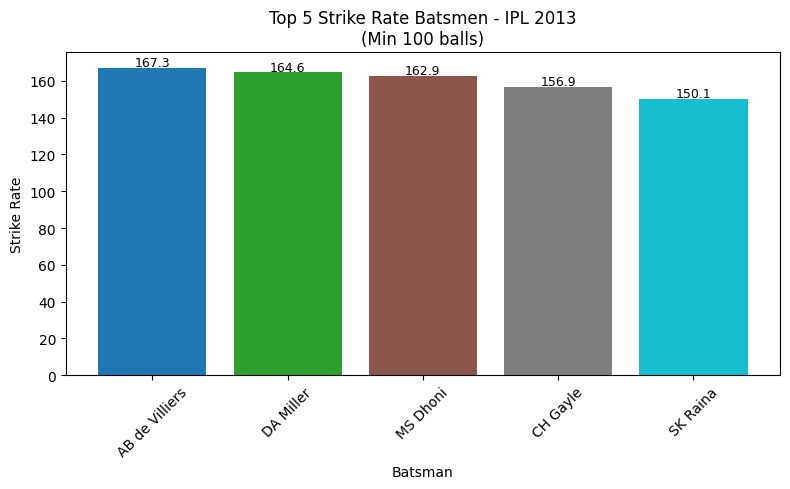

In [771]:
plot_top_strikers_by_season("2013",100)

<font color="red" size="5px">Highlight consistent performers and match winners (Player of the Match)</font>

In [772]:
pom_stats = (
    mat.groupby(['season', 'player_of_match'])
    .size()
    .reset_index(name='awards')
)

In [773]:
def plot_top_pom_by_season(season):
    # Filter required season
    data = pom_stats[pom_stats['season'] == season]
    
    # Top 5 by awards
    top5 = data.sort_values('awards', ascending=False).head(5)
    
    # Create color set
    colors = plt.cm.tab10(np.linspace(0, 1, len(top5)))
    
    # Bar plot
    plt.figure(figsize=(8,5))
    bars = plt.bar(top5['player_of_match'], top5['awards'], color=colors)
    
    # Label numbers above bars
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.05,
            f"{int(height)}",
            ha='center',
            fontsize=10
        )
    
    plt.title(f"Top 5 Player of the Match Winners - IPL {season}")
    plt.xlabel("Player")
    plt.ylabel("POTM Awards")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

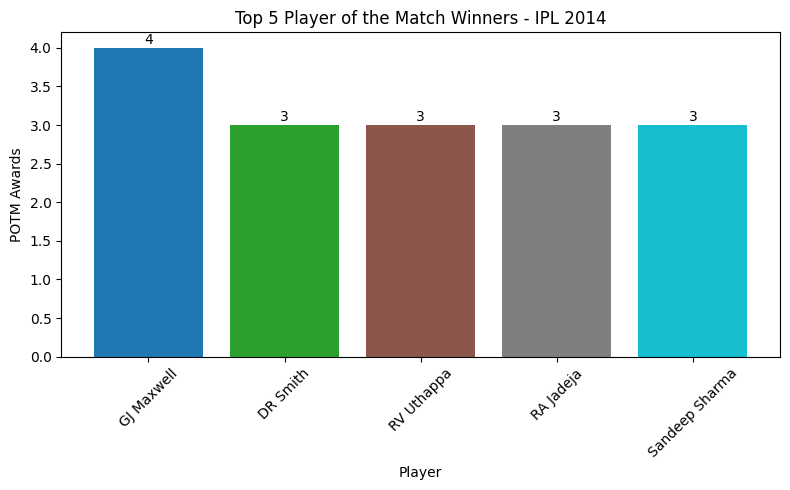

In [774]:
plot_top_pom_by_season('2014')

<h3>Batting Strategy Analysis</h3>

- Runs scored by batting order positions (openers vs middle order)
- Over-wise scoring patterns (Powerplay, Middle, Death overs)
- Analysis of high-scoring matches and successful run chases

<font color="red" size="5px">Runs scored by batting order positions (openers vs middle order)</font>

In [775]:
first_ball = deli.groupby(['match_id', 'inning', 'batter'])['ball'].min().reset_index()
first_ball['batting_position'] = first_ball.groupby(
    ['match_id', 'inning']
).rank(method='first')['ball'].astype(int)

In [776]:
deli = deli.merge(
    first_ball[['match_id', 'inning', 'batter', 'batting_position']],
    on=['match_id', 'inning', 'batter'],
    how='left'
)

In [777]:
deli['batting_position'].value_counts().sort_index()

batting_position
1     44897
2     44452
3     43402
4     40126
5     34480
6     24629
7     15125
8      8046
9      3616
10     1563
11      584
Name: count, dtype: int64

In [778]:
def get_batting_role(pos):
    if pos <= 2:
        return 'Openers'
    elif pos <= 5:
        return 'Middle Order'
    elif pos <= 7:
        return 'Finishers'
    else:
        return 'Tail Enders'

deli['batting_role'] = deli['batting_position'].apply(get_batting_role)

In [779]:
deli['batting_role'].value_counts()

batting_role
Middle Order    118008
Openers          89349
Finishers        39754
Tail Enders      13809
Name: count, dtype: int64

In [780]:
role_runs = (
    deli.groupby(['season', 'batting_role'])['batsman_runs']
    .sum()
    .reset_index()
)
role_runs.head()

,season,batting_role,batsman_runs
0,2007/08,Finishers,2962
1,2007/08,Middle Order,7278
2,2007/08,Openers,5743
3,2007/08,Tail Enders,826
4,2009,Finishers,1986


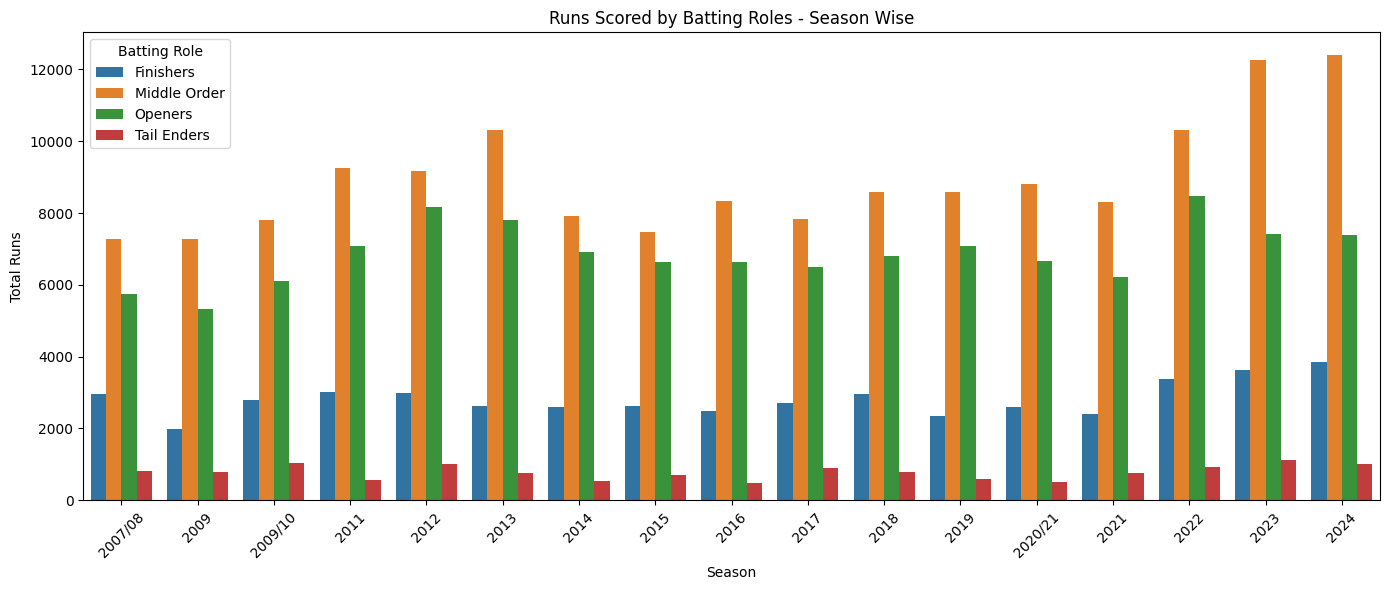

In [781]:
plt.figure(figsize=(14,6))
sns.barplot(data=role_runs, x='season', y='batsman_runs', hue='batting_role')

plt.title("Runs Scored by Batting Roles - Season Wise")
plt.xlabel("Season")
plt.ylabel("Total Runs")
plt.xticks(rotation=45)
plt.legend(title="Batting Role")
plt.tight_layout()
plt.show()

In [782]:
balls_df = deli[deli['extras_type'] != 'wides']
balls_per_role = (
    balls_df.groupby(['season', 'batting_role'])['ball']
    .count()
    .reset_index(name='balls_faced')
)
runs_per_role = (
    deli.groupby(['season', 'batting_role'])['batsman_runs']
    .sum()
    .reset_index(name='runs_scored')
)
role_stats = balls_per_role.merge(
    runs_per_role,
    on=['season', 'batting_role'],
    how='outer'
)
role_stats['strike_rate'] = (
    role_stats['runs_scored'] / role_stats['balls_faced'] * 100
).round(2)
role_stats.head()

,season,batting_role,balls_faced,runs_scored,strike_rate
0,2007/08,Finishers,2244,2962,132.00
1,2007/08,Middle Order,5581,7278,130.41
2,2007/08,Openers,4377,5743,131.21
3,2007/08,Tail Enders,830,826,99.52
4,2009,Finishers,1767,1986,112.39


In [783]:
role_stats.groupby('batting_role')[['balls_faced','runs_scored']].sum()

,balls_faced,runs_scored
batting_role,,
Finishers,38477,47971
Middle Order,114185,151924
Openers,86513,116929
Tail Enders,13365,13240


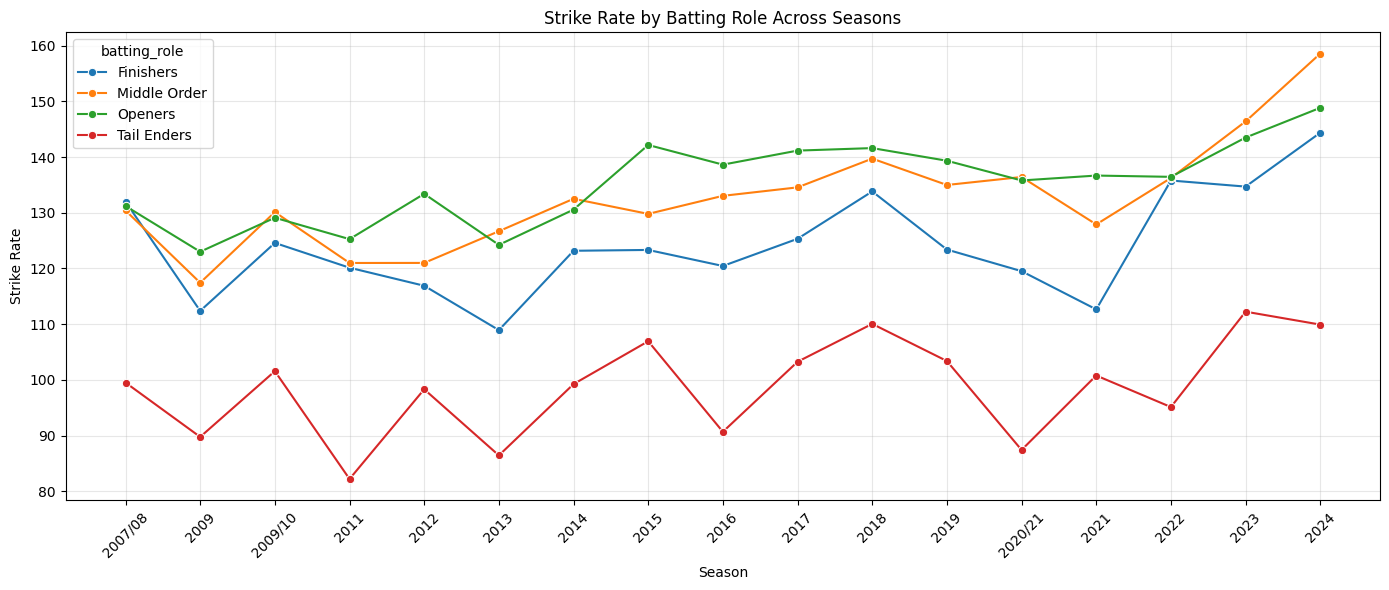

In [784]:
plt.figure(figsize=(14,6))
sns.lineplot(
    data=role_stats,
    x='season',
    y='strike_rate',
    hue='batting_role',
    marker='o'
)
plt.title("Strike Rate by Batting Role Across Seasons")
plt.xlabel("Season")
plt.ylabel("Strike Rate")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

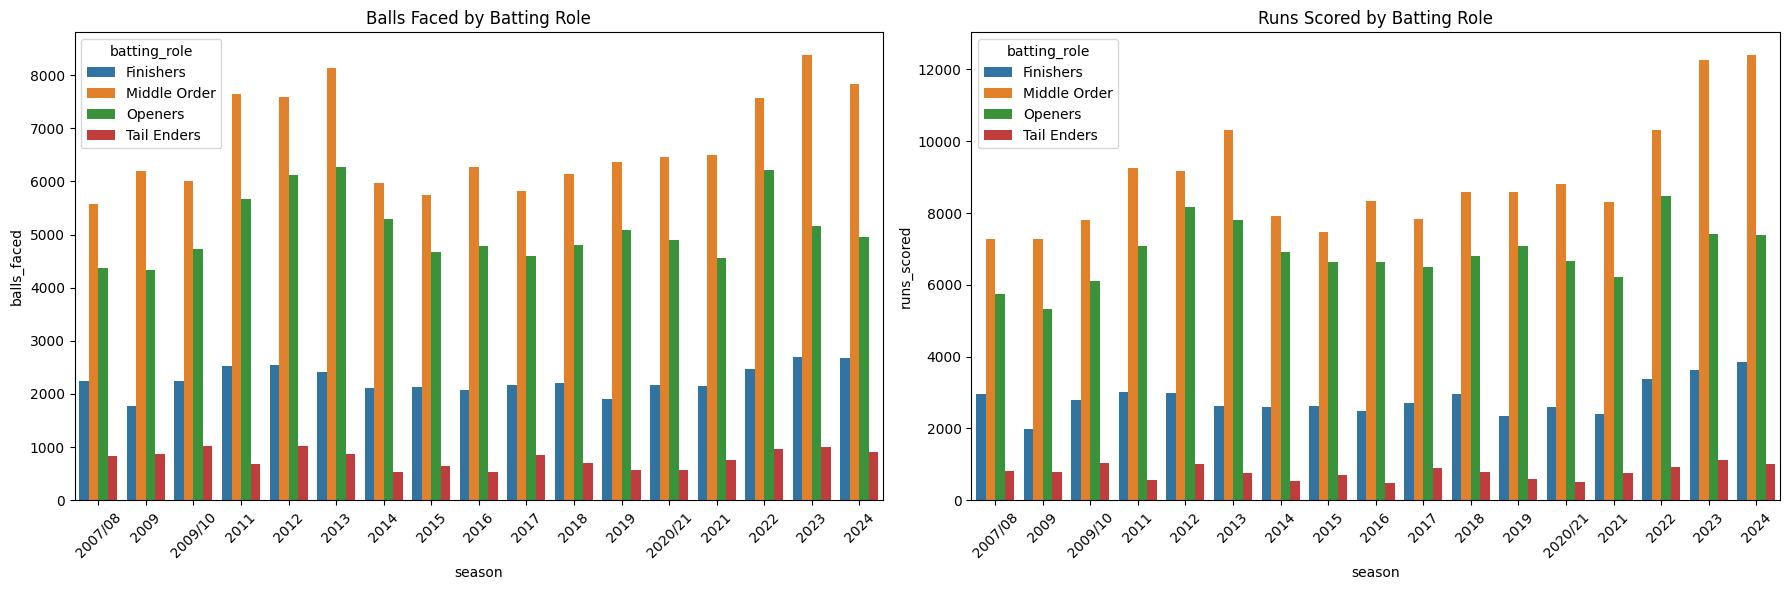

In [785]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))

# Balls faced
sns.barplot(
    data=role_stats,
    x='season',
    y='balls_faced',
    hue='batting_role',
    ax=axes[0]
)
axes[0].set_title("Balls Faced by Batting Role")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Runs scored
sns.barplot(
    data=role_stats,
    x='season',
    y='runs_scored',
    hue='batting_role',
    ax=axes[1]
)
axes[1].set_title("Runs Scored by Batting Role")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [786]:
role_stats['run_percent'] = (
    role_stats['runs_scored'] /
    role_stats.groupby('season')['runs_scored'].transform('sum')
) * 100

role_stats['run_percent'] = role_stats['run_percent'].round(2)

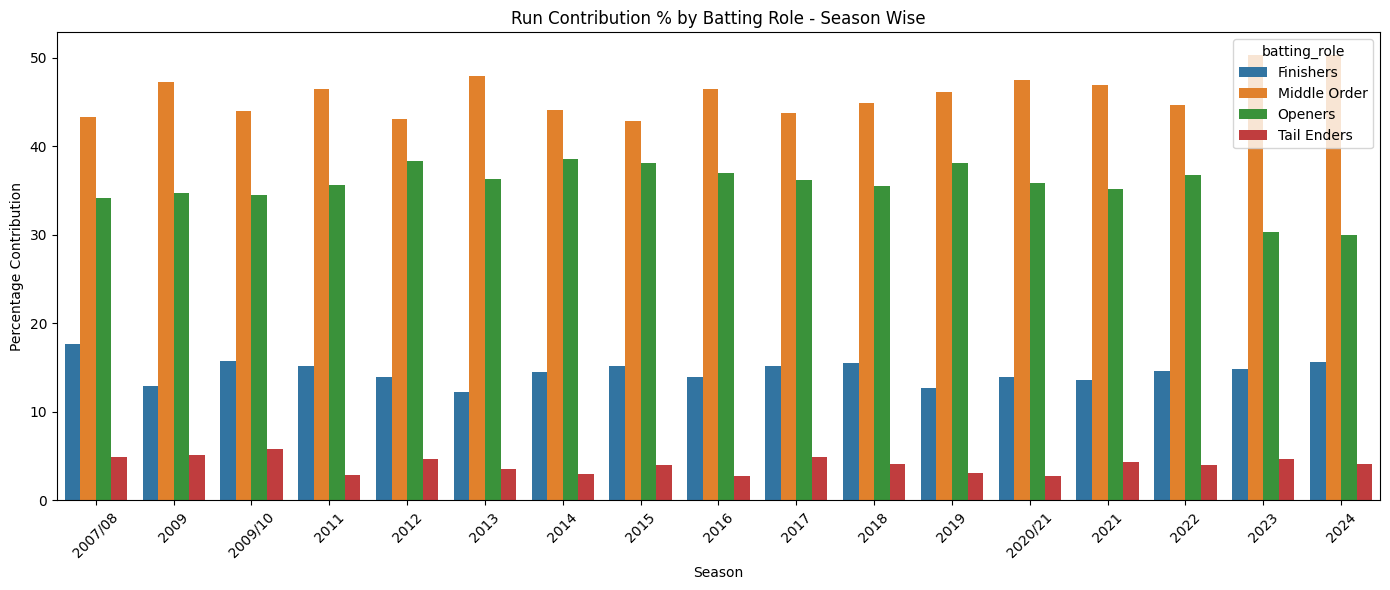

In [787]:
plt.figure(figsize=(14,6))
sns.barplot(
    data=role_stats,
    x='season',
    y='run_percent',
    hue='batting_role'
)
plt.title("Run Contribution % by Batting Role - Season Wise")
plt.xlabel("Season")
plt.ylabel("Percentage Contribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<font color="red" size="5px">Over-wise scoring patterns (Powerplay, Middle, Death overs)</font>

In [788]:
deli['over'] = deli['over'] + 1

In [789]:
def over_phase(over):
    if 1 <= over <= 6:
        return 'Powerplay (1-6)'
    elif 7 <= over <= 15:
        return 'Middle Overs (7-15)'
    elif 16 <= over <= 20:
        return 'Death Overs (16-20)'
    else:
        return 'Other'  # should not happen in T20

deli['over_phase'] = deli['over'].apply(over_phase)

In [790]:
# Remove wides for balls faced count
balls_df = deli[deli['extras_type'] != 'wides']

# Balls per phase
balls_phase = balls_df.groupby(['season', 'over_phase'])['ball'].count().reset_index(name='balls')

# Runs per phase
runs_phase = deli.groupby(['season', 'over_phase'])['total_runs'].sum().reset_index(name='runs')

# Merge both
phase_stats = balls_phase.merge(runs_phase, on=['season','over_phase'])
phase_stats['strike_rate'] = (phase_stats['runs'] / phase_stats['balls'] * 100).round(2)
phase_stats.head()

,season,over_phase,balls,runs,strike_rate
0,2007/08,Death Overs (16-20),2751,4506,163.79
1,2007/08,Middle Overs (7-15),6087,8073,132.63
2,2007/08,Powerplay (1-6),4194,5358,127.75
3,2009,Death Overs (16-20),2977,4489,150.79
4,2009,Middle Overs (7-15),6053,6898,113.96


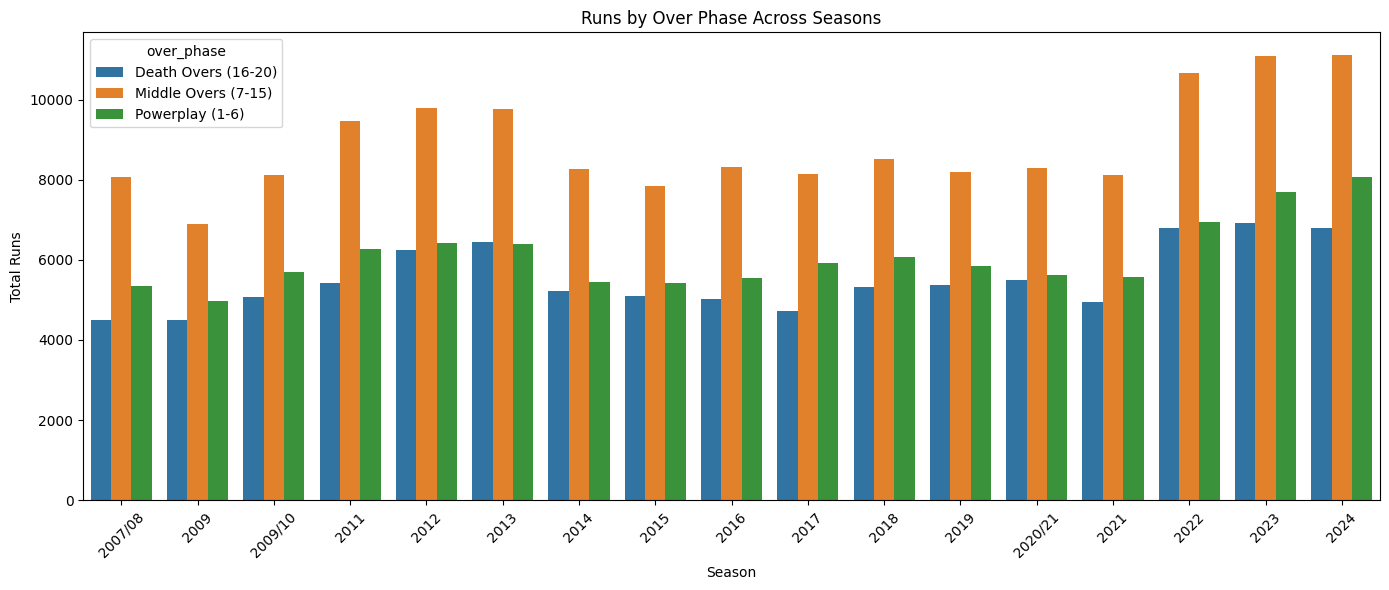

In [791]:
plt.figure(figsize=(14,6))
sns.barplot(data=phase_stats, x='season', y='runs', hue='over_phase')
plt.title("Runs by Over Phase Across Seasons")
plt.xlabel("Season")
plt.ylabel("Total Runs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

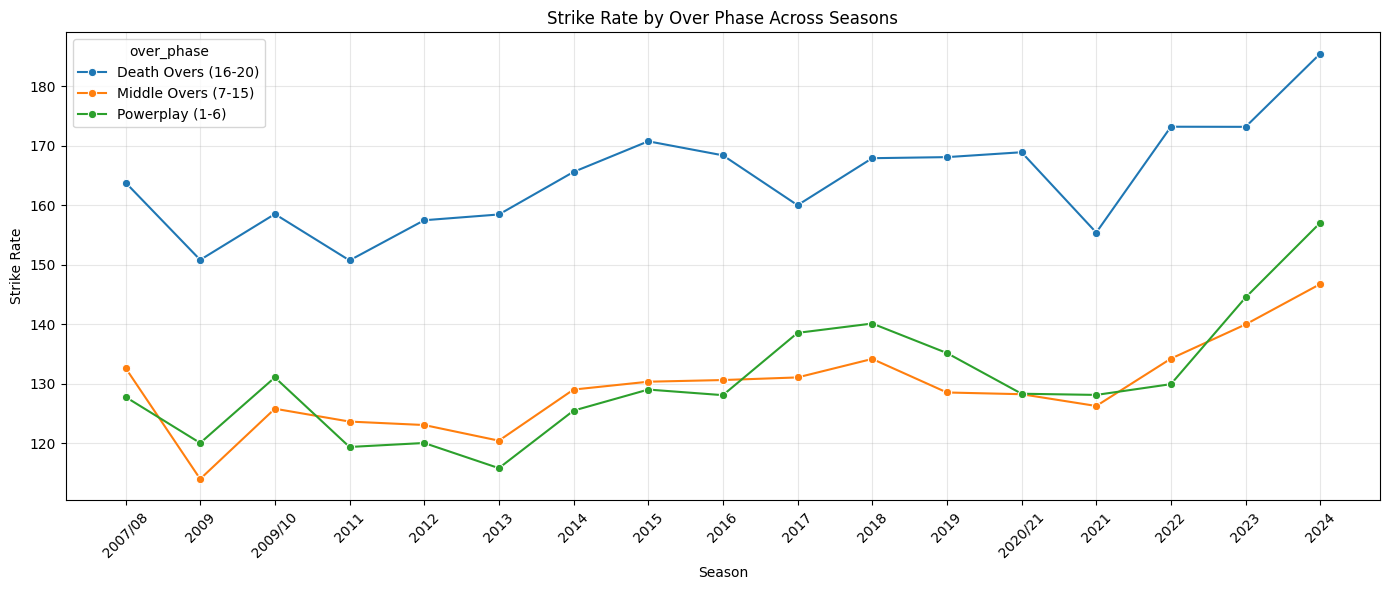

In [792]:
plt.figure(figsize=(14,6))
sns.lineplot(
    data=phase_stats,
    x='season', y='strike_rate',
    hue='over_phase',
    marker='o'
)
plt.title("Strike Rate by Over Phase Across Seasons")
plt.xlabel("Season")
plt.ylabel("Strike Rate")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<font color="red" size="5px">Analysis of high-scoring matches and successful run chases</font>

In [793]:
# Copy only relevant scoring columns into a new DataFrame
score_df = mat[['id', 'season', 'winner', 'toss_winner', 'toss_decision', 'result', 'result_margin', 'target_runs']].copy()

# Calculate first & second innings scores
score_df['chasing_score'] = score_df['target_runs']
score_df['first_score'] = score_df['target_runs'] + score_df['result_margin']

score_df.head()

,id,season,winner,toss_winner,toss_decision,result,result_margin,target_runs,chasing_score,first_score
0,335982,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,field,runs,140.0,223.0,223.0,363.0
1,335983,2007/08,Chennai Super Kings,Chennai Super Kings,bat,runs,33.0,241.0,241.0,274.0
2,335984,2007/08,Delhi Daredevils,Rajasthan Royals,bat,wickets,9.0,130.0,130.0,139.0
3,335985,2007/08,Royal Challengers Bangalore,Mumbai Indians,bat,wickets,5.0,166.0,166.0,171.0
4,335986,2007/08,Kolkata Knight Riders,Deccan Chargers,bat,wickets,5.0,111.0,111.0,116.0


In [794]:
high_scoring_df = score_df[
    (score_df['first_score'] >= 180) | (score_df['chasing_score'] >= 180)
].copy()

high_scoring_df.head()

,id,season,winner,toss_winner,toss_decision,result,result_margin,target_runs,chasing_score,first_score
0,335982,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,field,runs,140.0,223.0,223.0,363.0
1,335983,2007/08,Chennai Super Kings,Chennai Super Kings,bat,runs,33.0,241.0,241.0,274.0
7,335989,2007/08,Chennai Super Kings,Mumbai Indians,field,runs,6.0,209.0,209.0,215.0
8,335990,2007/08,Rajasthan Royals,Rajasthan Royals,field,wickets,3.0,215.0,215.0,218.0
9,335991,2007/08,Kings XI Punjab,Mumbai Indians,field,runs,66.0,183.0,183.0,249.0


In [795]:
high_score_season = high_scoring_df.groupby('season')['id'].count().reset_index(name='high_scoring_matches')
high_score_season

,season,high_scoring_matches
0,2007/08,22
1,2009,17
2,2009/10,34
3,2011,31
4,2012,29
5,2013,30
6,2014,27
7,2015,27
8,2016,22
9,2017,29


In [796]:
chase_df = score_df[
    (score_df['chasing_score'] > 0) & 
    (score_df['result'] != 'tie') &
    (score_df['result'] != 'no result')
].copy()

successful_chases_df = chase_df[chase_df['winner'] == chase_df['toss_winner']].copy()
successful_chases_df.head()

,id,season,winner,toss_winner,toss_decision,result,result_margin,target_runs,chasing_score,first_score
1,335983,2007/08,Chennai Super Kings,Chennai Super Kings,bat,runs,33.0,241.0,241.0,274.0
8,335990,2007/08,Rajasthan Royals,Rajasthan Royals,field,wickets,3.0,215.0,215.0,218.0
10,335992,2007/08,Rajasthan Royals,Rajasthan Royals,field,wickets,7.0,136.0,136.0,143.0
12,335994,2007/08,Deccan Chargers,Deccan Chargers,field,wickets,10.0,155.0,155.0,165.0
14,335996,2007/08,Chennai Super Kings,Chennai Super Kings,bat,runs,13.0,179.0,179.0,192.0


In [797]:
successful_chases_season = successful_chases_df.groupby('season')['id'].count().reset_index(name='successful_chases')
successful_chases_season

,season,successful_chases
0,2007/08,28
1,2009,33
2,2009/10,31
3,2011,38
4,2012,33
5,2013,35
6,2014,29
7,2015,27
8,2016,34
9,2017,29


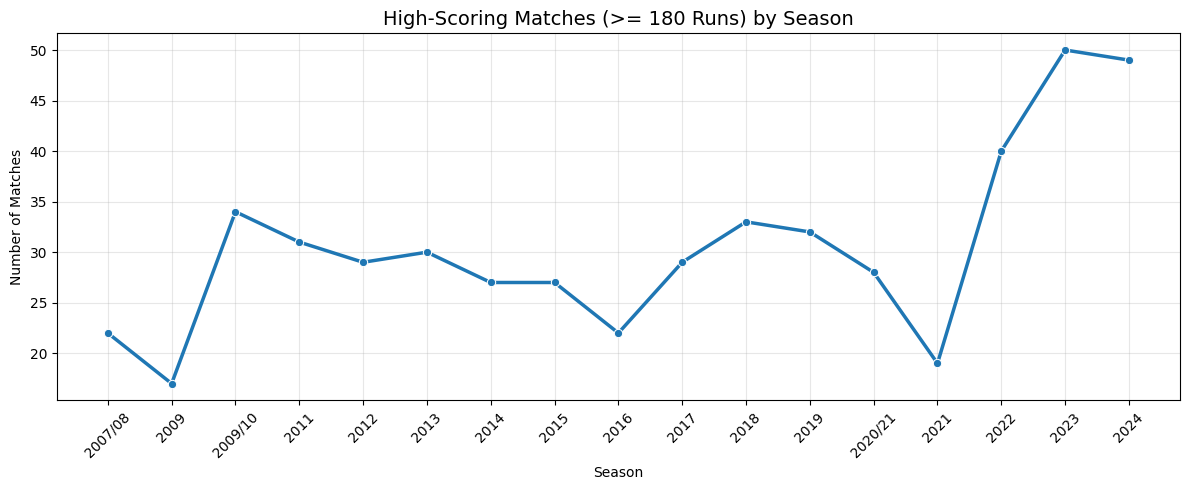

In [798]:
plt.figure(figsize=(12,5))
sns.lineplot(
    data=high_score_season,
    x='season',
    y='high_scoring_matches',
    marker='o',
    linewidth=2.5
)
plt.title("High-Scoring Matches (>= 180 Runs) by Season", fontsize=14)
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

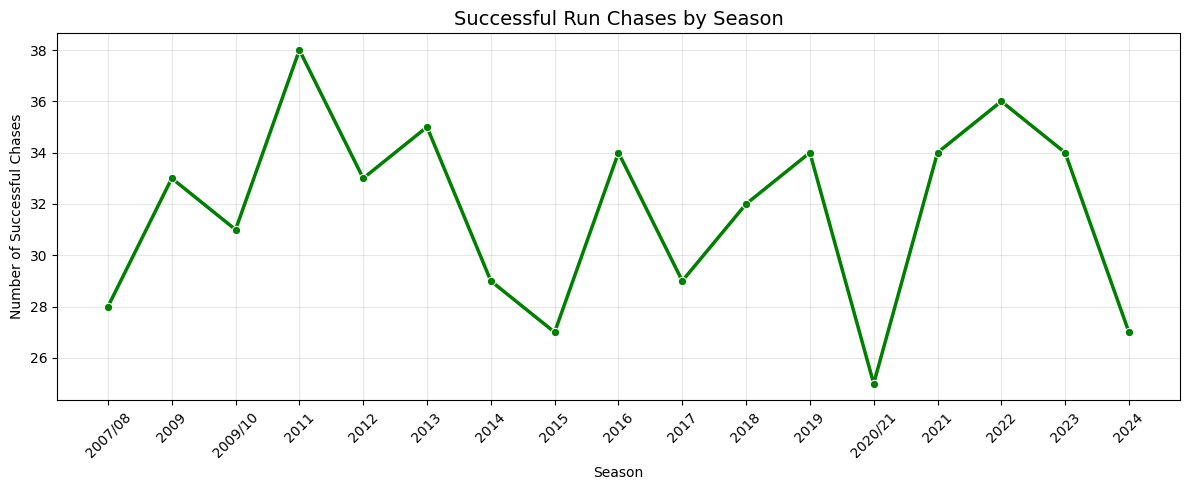

In [799]:
plt.figure(figsize=(12,5))
sns.lineplot(
    data=successful_chases_season,
    x='season',
    y='successful_chases',
    marker='o',
    color='green',
    linewidth=2.5
)
plt.title("Successful Run Chases by Season", fontsize=14)
plt.xlabel("Season")
plt.ylabel("Number of Successful Chases")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [800]:
def visualize_high_scoring(score_threshold=180):
    df = mat[['id', 'season', 'result_margin', 'target_runs']].copy()

    # Calculate scores
    df['chasing_score'] = df['target_runs']
    df['first_score'] = df['target_runs'] + df['result_margin']

    # Filter high scoring games
    high_scoring_df = df[
        (df['first_score'] >= score_threshold) |
        (df['chasing_score'] >= score_threshold)
    ]

    high_score_season = high_scoring_df.groupby('season')['id'].count().reset_index(name='high_scoring_matches')

    # Plot
    plt.figure(figsize=(12,5))
    sns.lineplot(
        data=high_score_season,
        x='season', y='high_scoring_matches',
        marker='o', linewidth=2.5
    )
    plt.title(f"High-Scoring Matches (≥ {score_threshold} runs) by Season", fontsize=14)
    plt.xlabel("Season")
    plt.ylabel("Number of Matches")
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

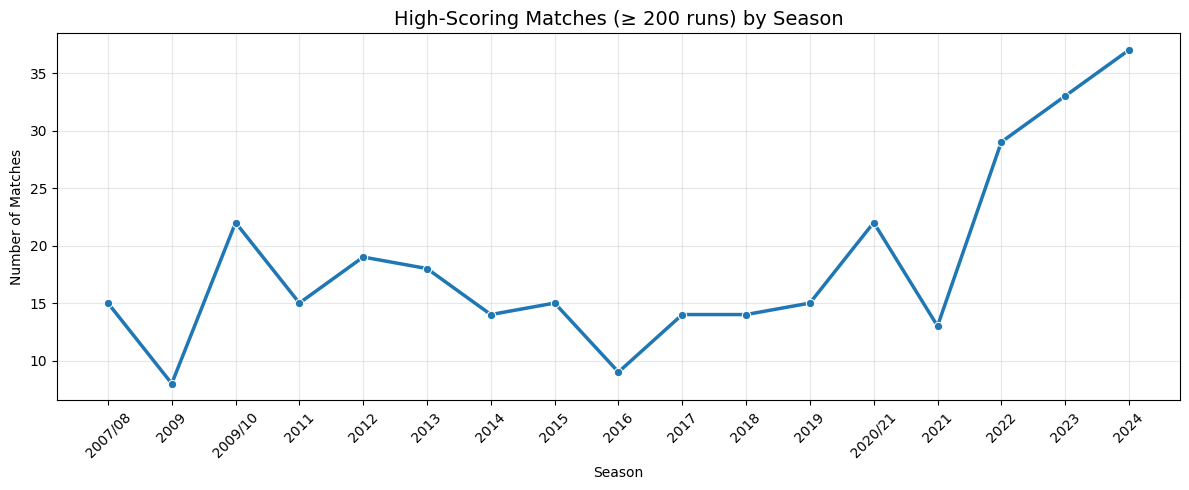

In [801]:
visualize_high_scoring(200)  

In [802]:
def visualize_successful_chases(chase_threshold=150):
    df = mat[['id', 'season', 'winner', 'toss_winner', 'toss_decision',
              'result', 'result_margin', 'target_runs']].copy()

    # Identify chases
    df['chasing_score'] = df['target_runs']

    chase_df = df[
        (df['chasing_score'] >= chase_threshold) &
        (df['result'] != 'tie') &
        (df['result'] != 'no result')
    ]

    successful_chases_df = chase_df[chase_df['winner'] == chase_df['toss_winner']]
    successful_chases_season = successful_chases_df.groupby('season')['id'].count().reset_index(name='successful_chases')

    # Plot
    plt.figure(figsize=(12,5))
    sns.lineplot(
        data=successful_chases_season,
        x='season', y='successful_chases',
        marker='o', color='green', linewidth=2.5
    )
    plt.title(f"Successful Run Chases (≥ {chase_threshold} runs) by Season", fontsize=14)
    plt.xlabel("Season")
    plt.ylabel("Matches Won While Chasing")
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

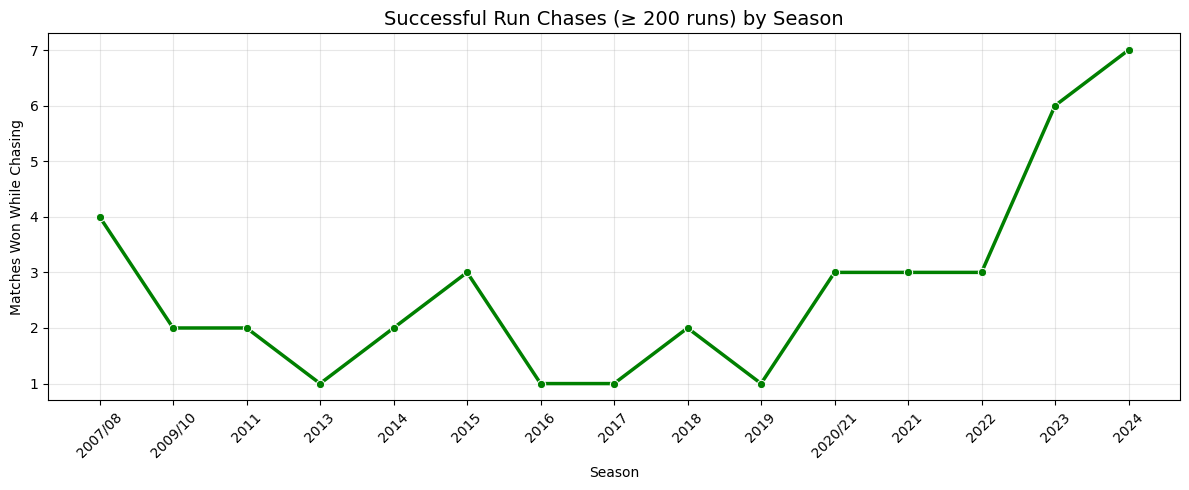

In [803]:
visualize_successful_chases(200)  

<font color="red" size="5px">Bowling Strategy Analysis</font>

- Wicket distribution by over and dismissal type
- Economy rate trends in different phases of the game
- Comparison of bowler performance across venues and eras

In [804]:
wickets = deli[deli['is_wicket'] == 1]

In [805]:
wicket_dist = wickets.groupby(['over_phase', 'dismissal_kind'])['is_wicket'].count().reset_index()
wicket_dist.sort_values(by='is_wicket', ascending=False).head()

,over_phase,dismissal_kind,is_wicket
11,Middle Overs (7-15),caught,3081
1,Death Overs (16-20),caught,2961
20,Powerplay (1-6),caught,2021
10,Middle Overs (7-15),bowled,825
0,Death Overs (16-20),bowled,814


In [806]:
pivot_wicket = wicket_dist.pivot(
    index="over_phase",
    columns="dismissal_kind",
    values="is_wicket"
)
pivot_wicket

dismissal_kind,bowled,caught,caught and bowled,hit wicket,lbw,obstructing the field,retired hurt,retired out,run out,stumped
over_phase,,,,,,,,,,
Death Overs (16-20),814.0,2961.0,121.0,9.0,192.0,3.0,4.0,2.0,595.0,87.0
Middle Overs (7-15),825.0,3081.0,174.0,3.0,352.0,NaN,5.0,1.0,332.0,226.0
Powerplay (1-6),573.0,2021.0,72.0,3.0,256.0,NaN,6.0,NaN,187.0,45.0


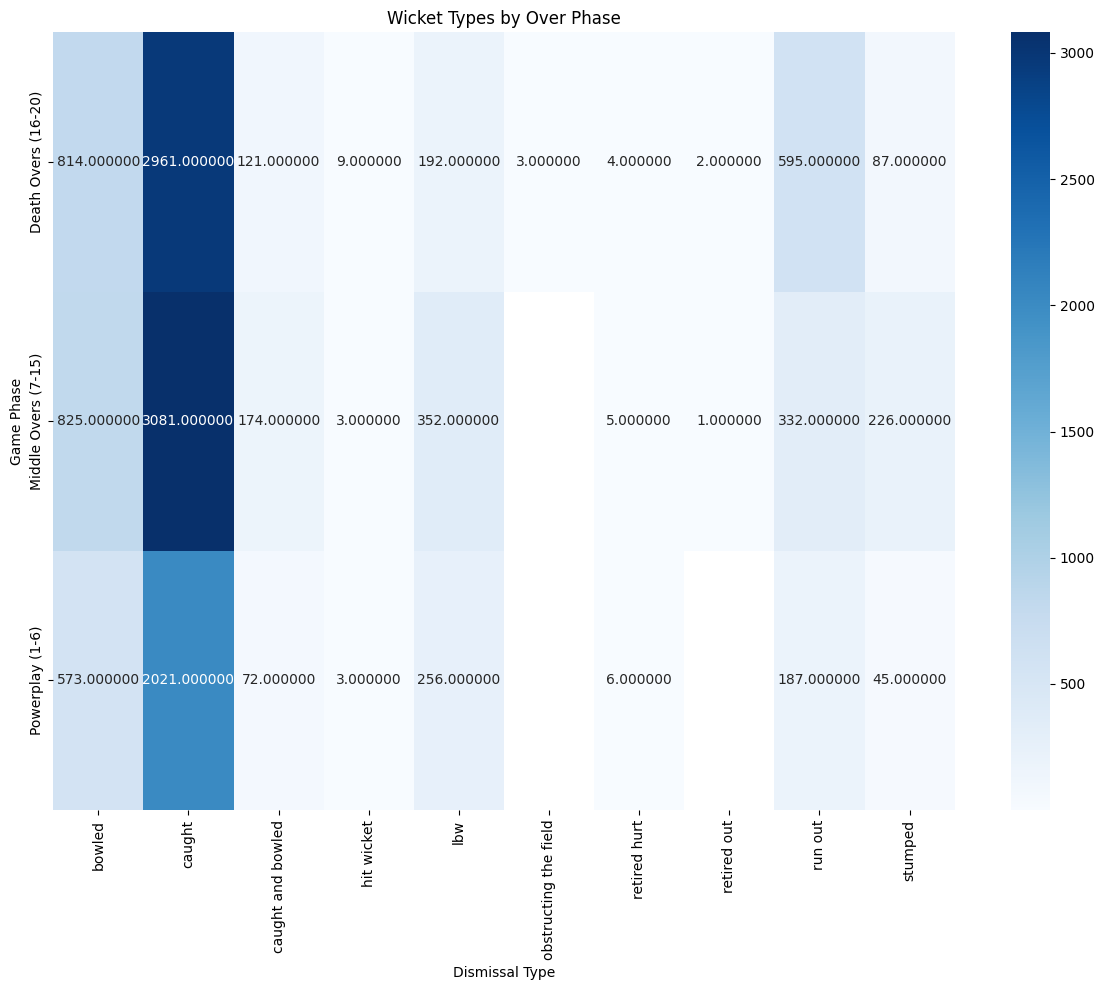

In [807]:
plt.figure(figsize=(12,10))
sns.heatmap(pivot_wicket, annot=True, fmt='f', cmap='Blues')
plt.title("Wicket Types by Over Phase")
plt.xlabel("Dismissal Type")
plt.ylabel("Game Phase")
plt.tight_layout()
plt.show()

In [808]:
wicket_dist.head()
wicket_dist['dismissal_kind'].unique()
wicket_dist['over_phase'].unique()

array(['Death Overs (16-20)', 'Middle Overs (7-15)', 'Powerplay (1-6)'],
      dtype=object)

In [809]:
legal_deliveries = deli[~deli['extras_type'].isin(['wides', 'noballs'])]

In [810]:
eco_phase = legal_deliveries.groupby(['season', 'over_phase']).agg(
    runs_conceded=('total_runs', 'sum'),
    balls=('ball', 'count')
).reset_index()

eco_phase['overs'] = eco_phase['balls'] / 6
eco_phase['economy'] = (eco_phase['runs_conceded'] / eco_phase['overs']).round(2)

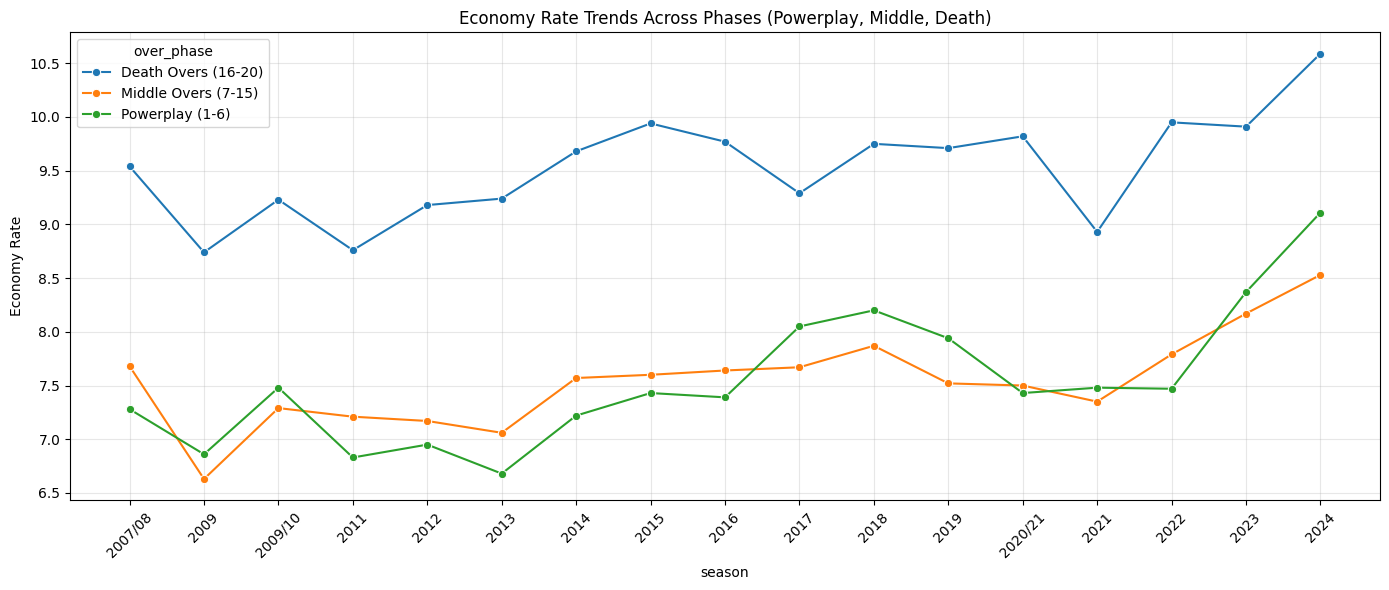

In [811]:
plt.figure(figsize=(14,6))
sns.lineplot(data=eco_phase, x='season', y='economy', hue='over_phase', marker='o')
plt.title("Economy Rate Trends Across Phases (Powerplay, Middle, Death)")
plt.ylabel("Economy Rate")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [812]:
venues = mat[['id', 'venue']].copy()

In [813]:
deli = deli.merge(venues, left_on='match_id', right_on='id', how='left')

In [814]:
deli['venue'].isna().sum()

np.int64(0)

In [815]:
# Legal deliveries (remove wides & no-balls for bowling metrics)
legal_deliveries = deli[~deli['extras_type'].isin(['wides','noballs'])]

# Wickets dataset
wickets = deli[deli['is_wicket'] == 1]

In [816]:
# Base bowling stats
bowler_venue = legal_deliveries.groupby(['bowler','venue']).agg(
    runs_conceded=('total_runs', 'sum'),
    balls=('ball', 'count'),
).reset_index()

# Wicket stats
wickets_venue = wickets.groupby(['bowler','venue'])['is_wicket'].count().reset_index(name='wickets')

# Combine
bowler_venue = bowler_venue.merge(wickets_venue, on=['bowler','venue'], how='left').fillna(0)

# More metrics
bowler_venue['overs'] = bowler_venue['balls'] / 6
bowler_venue['economy'] = (bowler_venue['runs_conceded'] / bowler_venue['overs']).replace([np.inf, -np.inf], np.nan).round(2)

bowler_venue['strike_rate'] = (bowler_venue['balls'] / bowler_venue['wickets']).replace([np.inf, -np.inf], np.nan).round(2)

bowler_venue.head()

,bowler,venue,runs_conceded,balls,wickets,overs,economy,strike_rate
0,A Ashish Reddy,Barabati Stadium,30,18,1.0,3.000000,10.00,18.0
1,A Ashish Reddy,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,20,18,1.0,3.000000,6.67,18.0
2,A Ashish Reddy,"Eden Gardens, Kolkata",15,12,1.0,2.000000,7.50,12.0
3,A Ashish Reddy,"M Chinnaswamy Stadium, Bengaluru",85,47,2.0,7.833333,10.85,23.5
4,A Ashish Reddy,"MA Chidambaram Stadium, Chepauk, Chennai",28,16,1.0,2.666667,10.50,16.0


In [817]:
def bowler_venue_performance(bowler_name, venue_name):
    bf = bowler_venue[
        (bowler_venue['bowler'] == bowler_name) &
        (bowler_venue['venue'] == venue_name)
    ]
    
    if bf.empty:
        print(f"No data found for {bowler_name} at {venue_name}")
        return
    
    print(f"\nPerformance of {bowler_name} at {venue_name}\n")
    display(bf[['bowler','venue','wickets','overs','economy','strike_rate']])
    
    # Visualize wickets
    fig, ax = plt.subplots(figsize=(5,4))
    sns.barplot(x=bf['bowler'], y=bf['wickets'], ax=ax)
    ax.set_title(f"Wickets by {bowler_name} at {venue_name}")
    ax.set_ylabel("Wickets")
    plt.tight_layout()
    plt.show()


Performance of RA Jadeja at Wankhede Stadium, Mumbai



,bowler,venue,wickets,overs,economy,strike_rate
3273,RA Jadeja,"Wankhede Stadium, Mumbai",18.0,69.166667,7.29,23.06


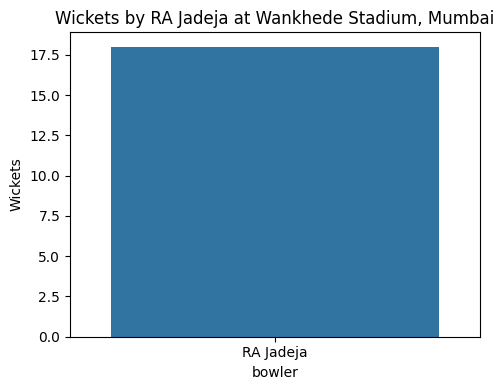

In [818]:
bowler_venue_performance('RA Jadeja', 'Wankhede Stadium, Mumbai')

In [819]:
bowler_venue['bowler'].value_counts()

bowler
RA Jadeja       35
PP Chawla       32
A Mishra        32
R Ashwin        31
I Sharma        30
                ..
AM Rahane        1
AA Noffke        1
AA Kazi          1
AJ Hosein        1
AC Gilchrist     1
Name: count, Length: 530, dtype: int64

In [820]:
# deli = deli.merge(
#     venues_season,
#     left_on='match_id',
#     right_on='id',
#     how='left'
# )

# deli = deli.merge(mat[['id', 'season', 'venue']],
#                        left_on='match_id',
#                        right_on='id',
#                        how='left')

In [821]:
# venues_season = mat[['id', 'venue', 'season']].copy()
# venues_season.head()

In [822]:
# deli = deli.drop(['season_x','season_y','id_x','id_y','venue_x','venue_y'],axis = 1)

In [823]:
# deli.info()

In [824]:
# print(deli[['match_id', 'venue', 'season']].head())
# print("\nMissing Venue count:", deli['venue'].isna().sum())

In [825]:
# Merge
deli = deli.merge(mat[['id', 'season', 'venue']],
                   left_on='match_id',
                   right_on='id',
                   how='left')

# Fix duplicated columns
deli.rename(columns={
    'season_y': 'season',
    'venue_y': 'venue'
}, inplace=True)

# Drop old/unwanted columns
deli.drop(columns=[col for col in ['season_x', 'venue_x', 'id_x', 'id_y'] if col in deli.columns],
          inplace=True)

# Verify
print(deli[['match_id', 'venue', 'season']].head())
print("\nMissing Venue count:", deli['venue'].isna().sum())


   match_id                             venue   season
0    335982  M Chinnaswamy Stadium, Bengaluru  2007/08
1    335982  M Chinnaswamy Stadium, Bengaluru  2007/08
2    335982  M Chinnaswamy Stadium, Bengaluru  2007/08
3    335982  M Chinnaswamy Stadium, Bengaluru  2007/08
4    335982  M Chinnaswamy Stadium, Bengaluru  2007/08

Missing Venue count: 0


In [826]:
legal_deliveries = deli[~deli['extras_type'].isin(['wides','noballs'])]
wickets = deli[deli['is_wicket'] == 1]

bowler_season_venue = legal_deliveries.groupby(['bowler','venue','season']).agg(runs_conceded=('total_runs', 'sum'),balls=('ball', 'count'),).reset_index()

In [827]:
bowler_season_venue.head()
bowler_season_venue.columns

Index(['bowler', 'venue', 'season', 'runs_conceded', 'balls'], dtype='object')

In [828]:
legal_deliveries = deli[~deli['extras_type'].isin(['wides','noballs'])]
wickets = deli[deli['is_wicket'] == 1]

bowler_season_venue = legal_deliveries.groupby(
    ['bowler','venue','season']
).agg(
    runs_conceded=('total_runs', 'sum'),
    balls=('ball', 'count'),
).reset_index()

wickets_season_venue = wickets.groupby(
    ['bowler','venue','season']
)['is_wicket'].count().reset_index(name='wickets')

bowler_season_venue = bowler_season_venue.merge(
    wickets_season_venue,
    on=['bowler','venue','season'], how='left'
).fillna(0)

bowler_season_venue['overs'] = bowler_season_venue['balls'] / 6
bowler_season_venue['economy'] = (
    bowler_season_venue['runs_conceded'] / bowler_season_venue['overs']
).replace([np.inf,-np.inf], np.nan).round(2)

bowler_season_venue['strike_rate'] = (
    bowler_season_venue['balls'] / bowler_season_venue['wickets']
).replace([np.inf,-np.inf], np.nan).round(2)

In [829]:
def bowler_venue_trend(bowler_name, venue_name, metric='economy'):
    allowed = ['economy', 'wickets', 'strike_rate']
    if metric not in allowed:
        print(f"Choose metric from: {allowed}")
        return
    
    data = bowler_season_venue[
        (bowler_season_venue['bowler'] == bowler_name) &
        (bowler_season_venue['venue'] == venue_name)
    ]
    
    if data.empty:
        print(f"No data found for {bowler_name} at {venue_name}")
        return
    
    plt.figure(figsize=(12,5))
    ax = sns.lineplot(data=data, x='season', y=metric, marker='o', linewidth=2)
    
    # Add value labels
    for i, row in data.iterrows():
        ax.text(row['season'], row[metric], str(row[metric]),
                ha='center', va='bottom', fontsize=9)
    
    plt.title(f"{metric.capitalize()} Trend: {bowler_name} at {venue_name}", fontsize=14)
    plt.xlabel("Season")
    plt.ylabel(metric.capitalize())
    plt.grid(alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

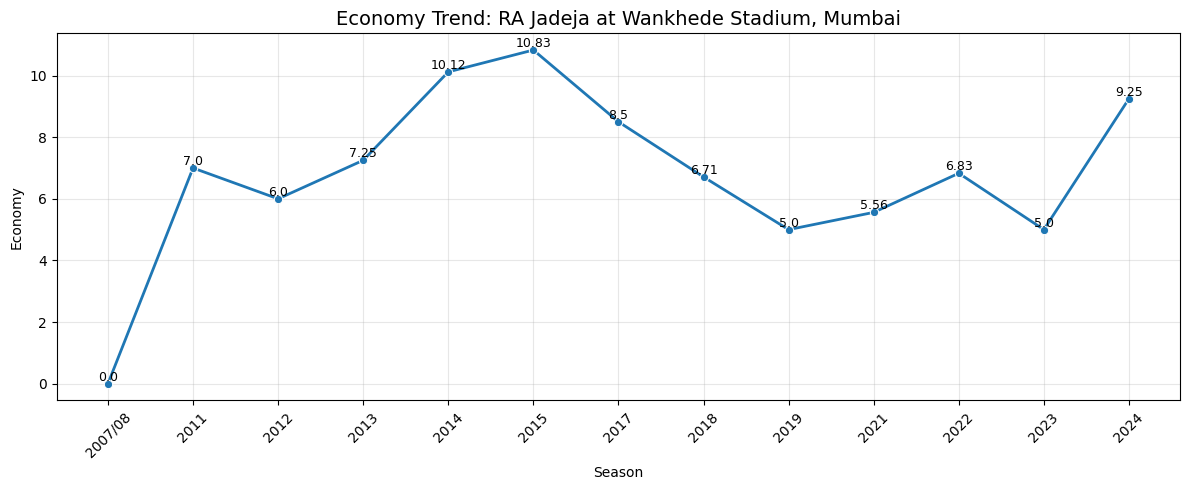

In [830]:
bowler_venue_trend('RA Jadeja', 'Wankhede Stadium, Mumbai', metric='economy')

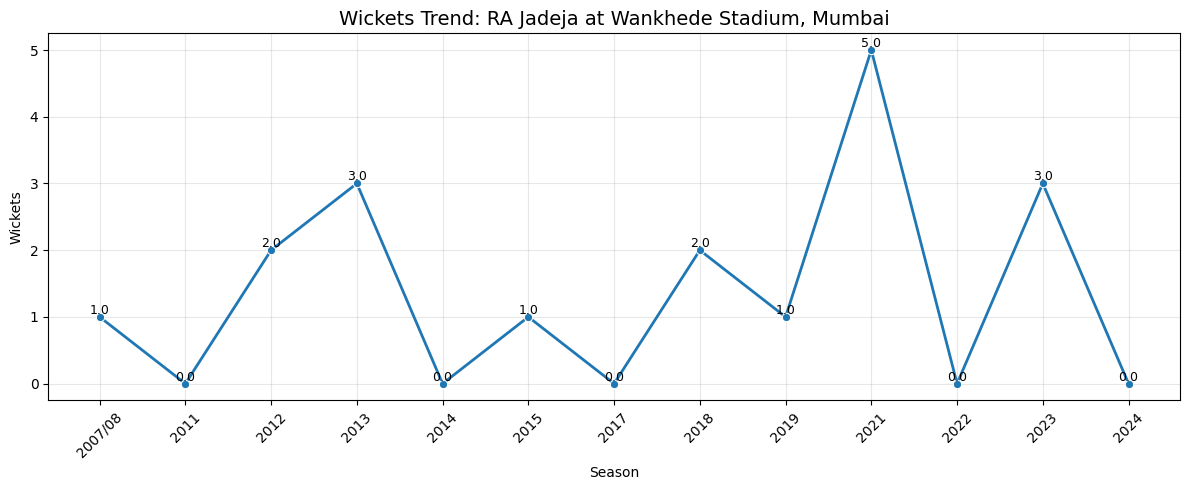

In [831]:
bowler_venue_trend('RA Jadeja', 'Wankhede Stadium, Mumbai', metric='wickets')

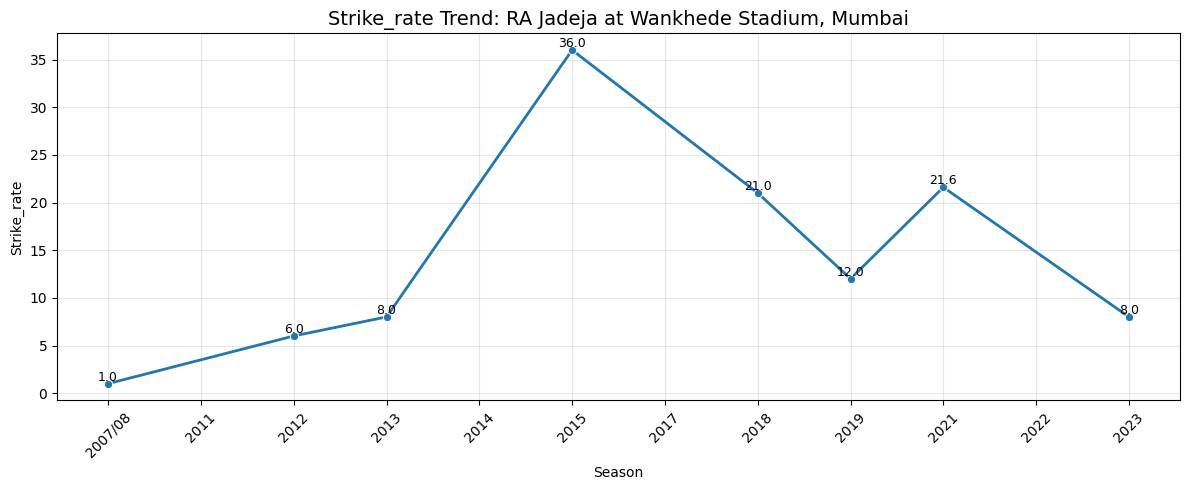

In [832]:
bowler_venue_trend('RA Jadeja', 'Wankhede Stadium, Mumbai', metric='strike_rate')

In [833]:
legal_balls = deli[deli['extras_type'] != 'wides']

<font color="red" size="5px">Batter Venue Trends</font>

In [834]:
batter_season_venue = legal_balls.groupby(
    ['batter', 'venue', 'season']
).agg(
    runs=('batsman_runs', 'sum'),
    balls=('ball', 'count')
).reset_index()

batter_season_venue['strike_rate'] = (
    batter_season_venue['runs'] / batter_season_venue['balls'] * 100
).round(2)

In [835]:
def batter_venue_trend(batter_name, venue_name, metric='strike_rate'):
    allowed = ['runs', 'balls', 'strike_rate']
    if metric not in allowed:
        print(f"❌ Choose metric from: {allowed}")
        return
    
    data = batter_season_venue[
        (batter_season_venue['batter'] == batter_name) &
        (batter_season_venue['venue'] == venue_name)
    ]
    
    if data.empty:
        print(f"No data for {batter_name} at {venue_name}")
        return
    
    plt.figure(figsize=(12,5))
    ax = sns.lineplot(data=data, x='season', y=metric, marker='o', linewidth=2)
    
    # Add value labels
    for i, row in data.iterrows():
        ax.text(row['season'], row[metric], str(row[metric]),
                ha='center', va='bottom', fontsize=9)
    
    plt.title(f"{metric.capitalize()} Trend: {batter_name} at {venue_name}", fontsize=14)
    plt.xlabel("Season")
    plt.ylabel(metric.capitalize())
    plt.grid(alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

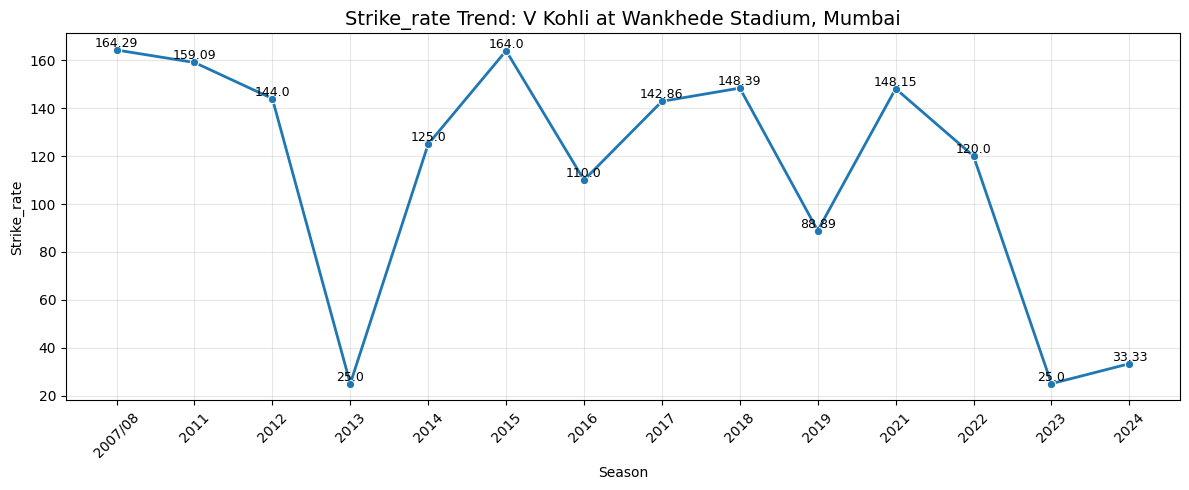

In [836]:
batter_venue_trend('V Kohli', 'Wankhede Stadium, Mumbai', metric='strike_rate')

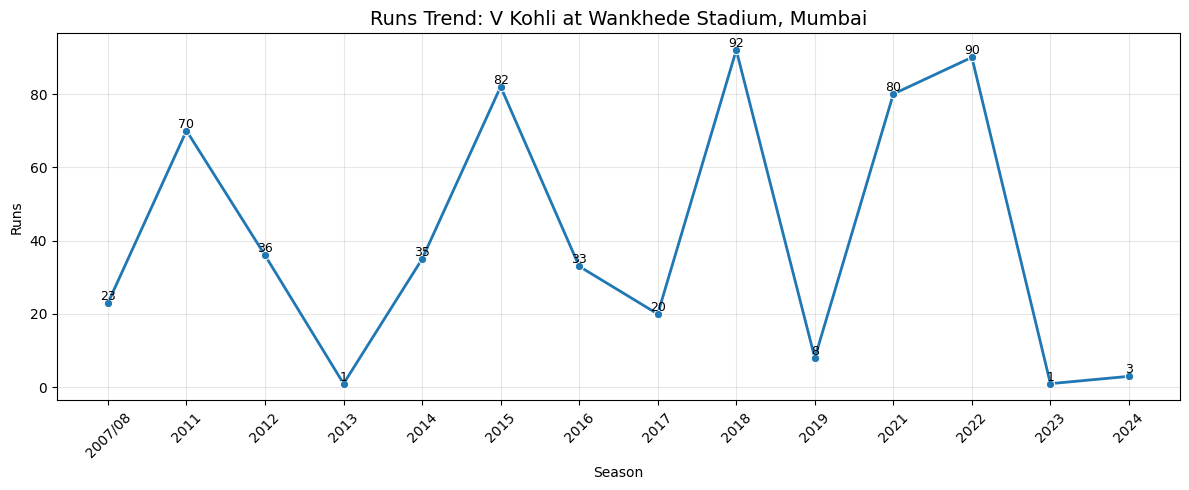

In [837]:
batter_venue_trend('V Kohli', 'Wankhede Stadium, Mumbai', metric='runs')

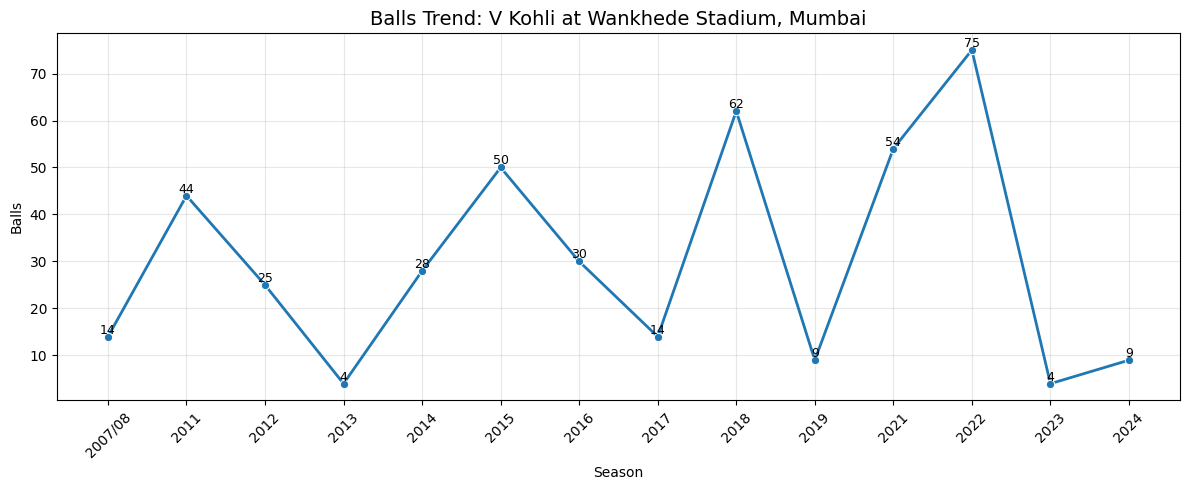

In [838]:
batter_venue_trend('V Kohli', 'Wankhede Stadium, Mumbai', metric='balls')

In [839]:
# mat.to_csv("match_data.csv", index=False)
# batter_season_venue.to_csv("batter_venue_stats.csv", index=False)
# bowler_season_venue.to_csv("bowler_venue_stats.csv", index=False)
# role_stats.to_csv("role_stats.csv", index=False)
# phase_stats.to_csv("phase_stats.csv", index=False)